In [212]:
# Loading the required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import RidgeCV

<center>
    <img src="https://raw.githubusercontent.com/errikadd/Laptop_Price_DataAnalysis/main/images/title.png" width="100%" align='center' alt="data analysis image">
</center>

<h1 align='center'>Regression Model Development and Evaluation: Laptop Prices</h1>

<p align='center'>The goal of this analysis is to develop a predictive model for laptop prices using a combination of numerical and categorical features.</p>

<br>
<h3>About the Dataset</h3>

Dataset: <a href="https://www.kaggle.com/datasets/abdelrahmanemad594/laptop-prices">"Laptop Prices"</a> by Abdelrahman Emad from <a href="https://www.kaggle.com/">Kaggle.com</a><br>
License: <a href="https://www.apache.org/licenses/LICENSE-2.0">"Apache License, Version 2.0"</a><br>
The dataset provides information about specifications of various laptop models, along with their prices. A detailed description of this dataset can be obtained <a href="https://www.kaggle.com/datasets/abdelrahmanemad594/laptop-prices">here</a>.

In [213]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [214]:
# Do not use scientific notation for numbers
pd.set_option('display.float_format', '{:,.2f}'.format)

<br>
<br>
<br>
<h1 align='center'>Data Wrangling</h1>

In [215]:
# Loading data to dataframe
filepath = "https://raw.githubusercontent.com/errikadd/Laptop_Price_DataAnalysis/refs/heads/main/data/Laptop-Price.csv"
df = pd.read_csv(filepath, header=0)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.60,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.00
1,Acer,Aspire 3,Notebook,15.60,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.00,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,"1,495.00"
3,Acer,Swift 3,Ultrabook,14.00,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.00
4,HP,250 G6,Notebook,15.60,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.90


In [216]:
# Finding the size of the dataset
df.shape

(1146, 18)

In [217]:
# Printing the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Unnamed: 16       0 non-null      float64


In [218]:
# Printing the statistical description of the dataset, including that of 'object' data types
df.describe(include='all')

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
count,1146,1146,1146,"1,146.00",1146,1146,1146,1146,1146,1146,"1,146.00","1,146.00","1,146.00","1,146.00",1146,1146,0.00,"1,146.00"
unique,17,527,6,NaN,34,8,7,2,65,27,NaN,NaN,NaN,NaN,3,96,NaN,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 7200U,2.5GHz,NaN,NaN,NaN,NaN,Intel,HD Graphics 620,NaN,NaN
freq,284,30,626,NaN,494,600,980,1088,193,290,NaN,NaN,NaN,NaN,578,281,NaN,NaN
mean,NaN,NaN,NaN,15.15,NaN,NaN,NaN,NaN,NaN,NaN,187.71,46.35,1.90,0.54,NaN,NaN,NaN,"1,204.88"
std,NaN,NaN,NaN,1.32,NaN,NaN,NaN,NaN,NaN,NaN,160.31,144.19,26.28,15.04,NaN,NaN,NaN,676.63
min,NaN,NaN,NaN,11.30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,265.00
25%,NaN,NaN,NaN,14.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,699.75
50%,NaN,NaN,NaN,15.60,NaN,NaN,NaN,NaN,NaN,NaN,256.00,0.00,0.00,0.00,NaN,NaN,NaN,"1,049.75"
75%,NaN,NaN,NaN,15.60,NaN,NaN,NaN,NaN,NaN,NaN,256.00,1.00,0.00,0.00,NaN,NaN,NaN,"1,535.00"


In [219]:
# Testing for empty values (NULL values)
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
Ram                    0
OpSys                  0
Cpu Brand              0
Cpu Model              0
Cpu Rate               0
SSD                    0
HDD                    0
Flash Storage          0
Hybrid                 0
Gpu Brand              0
Gpu Model              0
Unnamed: 16         1146
Price_euros            0
dtype: int64

In [220]:
# Droping the column with NULL values
df.drop(['Unnamed: 16'],axis=1,inplace=True)

In [221]:
# Checking for duplicates
print("Rows with duplicate values: ", df.duplicated().sum())
df[df.duplicated()]

Rows with duplicate values:  18


,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
1128,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.30,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core M 6Y30,0.9GHz,512,0,0,0,Intel,HD Graphics 515,729.00
1129,Dell,Inspiron 3567,Notebook,15.60,1366x768,6GB,Windows 10,Intel,Core i3 7100U,2.4GHz,0,1,0,0,Intel,HD Graphics 620,459.00
1130,Lenovo,IdeaPad Y700-15ISK,Notebook,15.60,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i7 6700HQ,2.6GHz,0,1,0,0,Nvidia,GeForce GTX 960M,899.00
1131,HP,Pavilion 15-AW003nv,Notebook,15.60,Full HD 1920x1080,6GB,Windows 10,AMD,A9-Series 9410,2.9GHz,0,0,0,10,AMD,Radeon R7 M440,549.99
1132,Dell,Inspiron 3567,Notebook,15.60,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,805.99
1133,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.60,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,720.32
1134,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.00,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,638.00
1135,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.30,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,"1,499.00"
1136,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.60,1366x768,6GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,1,0,0,AMD,Radeon R5 M330,764.00
1137,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.30,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core M 6Y30,0.9GHz,512,0,0,0,Intel,HD Graphics 515,729.00


In [222]:
# Dropping the duplicates
df = df.drop_duplicates()
df[df.duplicated()]

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros


In [223]:
# Checking data type of each column
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Ram                  object
OpSys                object
Cpu Brand            object
Cpu Model            object
Cpu Rate             object
SSD                   int64
HDD                   int64
Flash Storage         int64
Hybrid                int64
Gpu Brand            object
Gpu Model            object
Price_euros         float64
dtype: object

In [224]:
# Renaming columns
df = df.rename(columns={'TypeName': 'Type_Name', 'ScreenResolution': 'Screen_Resolution', \
                'Ram': 'RAM', 'OpSys': 'Operating_System', 'Cpu Brand': 'CPU_Brand', \
                'Cpu Model': 'CPU_Model', 'Cpu Rate': 'CPU_Rate', 'Cpu Brand': 'CPU_Brand', \
                'Flash Storage': 'Flash_Storage', 'Gpu Brand': 'GPU_Brand', 'Gpu Model': 'GPU_Model', \
                'Price_euros': 'Price_EUR'})
df.head(2)

,Company,Product,Type_Name,Inches,Screen_Resolution,RAM,Operating_System,CPU_Brand,CPU_Model,CPU_Rate,SSD,HDD,Flash_Storage,Hybrid,GPU_Brand,GPU_Model,Price_EUR
0,HP,250 G6,Notebook,15.60,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,575.00
1,Acer,Aspire 3,Notebook,15.60,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,400.00


In [225]:
# Converting the column 'RAM' to integer
df['RAM_Integer'] = df['RAM'].apply(lambda x: x.replace('GB', '')).astype(int)
# Dropping the column 'RAM'
df.drop(['RAM'],axis=1,inplace=True)

In [226]:
# Converting the column 'CPU_Rate' to float
df['CPU_Rate_Integer'] = df['CPU_Rate'].apply(lambda x: x.replace('GHz', '')).astype(float)
# Dropping the column 'CPU_Rate'
df.drop(['CPU_Rate'],axis=1,inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 1127
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1128 non-null   object 
 1   Product            1128 non-null   object 
 2   Type_Name          1128 non-null   object 
 3   Inches             1128 non-null   float64
 4   Screen_Resolution  1128 non-null   object 
 5   Operating_System   1128 non-null   object 
 6   CPU_Brand          1128 non-null   object 
 7   CPU_Model          1128 non-null   object 
 8   SSD                1128 non-null   int64  
 9   HDD                1128 non-null   int64  
 10  Flash_Storage      1128 non-null   int64  
 11  Hybrid             1128 non-null   int64  
 12  GPU_Brand          1128 non-null   object 
 13  GPU_Model          1128 non-null   object 
 14  Price_EUR          1128 non-null   float64
 15  RAM_Integer        1128 non-null   int64  
 16  CPU_Rate_Integer   1128 non-n

<h5>Extracting information from the dataset</h5>

In [228]:
# Checking for unique values in the column 'Screen_Resolution'
unique_screen_resolution = df['Screen_Resolution'].unique()
print(unique_screen_resolution)

['Full HD 1920x1080' '1366x768' 'IPS Panel Full HD 1920x1080'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'Touchscreen 2256x1504' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 1366x768' 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'Touchscreen 2400x1600' '2560x1440'
 'IPS Panel Quad HD+ 2560x1440' 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800' '1920x1080'
 'IPS Panel Full HD 1920x1200' 'IPS Panel Touchscreen 1366x768'
 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160'
 'IPS Panel Retina Display 2304x1440' 'IPS Panel Touchscreen 2560x1440'
 'Touchscreen / Full HD 1920x1080' 'Quad HD+ 3200x1800'
 'Touchscreen / 4K Ultra 

In [229]:
# Extracting information (Touchscreen, IPS, Resolution_X, Resolution_Y) from the column 'Screen_Resolution'
df['Touchscreen'] = df['Screen_Resolution'].str.contains('Touchscreen', case=False, na=False).astype(int)
df['IPS'] = df['Screen_Resolution'].str.contains('IPS', case=False, na=False).astype(int)

# Extracting screen resolution
resolution = df['Screen_Resolution'].str.extract(r'(\d+)\s*x\s*(\d+)') 
df['Resolution_X'] = pd.to_numeric(resolution[0], errors='coerce')
df['Resolution_Y'] = pd.to_numeric(resolution[1], errors='coerce')

# Calculating PPI (pixels per inch)
df['PPI'] = ((df['Resolution_X']**2 + df['Resolution_Y']**2)**0.5 / df['Inches']).round(1)

# Dropping the column 'Screen_Resolution'
df = df.drop('Screen_Resolution', axis=1)

In [230]:
# Checking for unique values in the column 'CPU_Model'
unique_CPU = df['CPU_Model'].unique()
print(unique_CPU)

['Core i5 7200U' 'A9-Series 9420' 'Core i7 8550U' 'Core i5 8250U'
 'Core i3 6006U' 'Core i7 7500U' 'Core i3 7100U' 'Core i5 7300HQ'
 'A6-Series 9220' 'Core i3 7130U' 'Core i7 7700HQ' 'Ryzen 1700' 'FX 9830P'
 'Core i7 7560U' 'E-Series 6110' 'Core i5 6200U' 'Core M 6Y75'
 'Core i5 7500U' 'Core i7 6920HQ' 'Core i5 7Y54' 'Core i7 7820HK'
 'Xeon E3-1505M V6' 'Core i7 6500U' 'E-Series 9000e'
 'A10-Series A10-9620P' 'A6-Series A6-9220' 'Core i7 6600U'
 'Core i7 7820HQ' 'A10-Series 9600P' 'Core i7 7600U' 'A8-Series 7410'
 'A12-Series 9720P' 'Core i5 7300U' 'Core i7 8650U' 'Core i5 6440HQ'
 'Core i7 6820HQ' 'Ryzen 1600' 'Core i7 7Y75' 'Core i5 7440HQ'
 'Core i7 7660U' 'Core i5 7Y57' 'Core i7 6700HQ' 'Core i3 6100U'
 'A10-Series 9620P' 'E-Series 7110' 'A9-Series A9-9420' 'Core i7 6820HK'
 'Core M 7Y30' 'Xeon E3-1535M v6' 'Core i5 6300U' 'Core i5 6300HQ'
 'A6-Series 7310' 'Atom Z8350' 'Core i5 6260U' 'Core M' 'A12-Series 9700P'
 'A4-Series 7210' 'Core i7 6560U' 'Core M m7-6Y75' 'FX 8800P'
 'Core 

In [231]:
# Extracting CPU generation from the column 'CPU_Model'
def extract_cpu_generation(cpu):
    cpu = str(cpu)

    # Intel 6th Generation
    if re.search(r'(6006U|6200U|6Y75|6920HQ|6500U|6600U|6440HQ|6820HQ|6700HQ|6100U|6820HK|6300U|6300HQ|6260U|6560U|M7-6Y75|6Y54|6Y30|m7-6Y75)', cpu):
        cpu_generation = '6'
    # Intel 7th Generation
    elif re.search(r'(7200U|7500U|7100U|7300HQ|7130U|7700HQ|7560U|7Y54|7820HK|7820HQ|7600U|7300U|7Y75|7440HQ|7660U|7Y57|7Y30)', cpu):
        cpu_generation = '7'
    # Intel 8th Generation
    elif re.search(r'(8550U|8250U|8650U)', cpu):
        cpu_generation = '8'
    # AMD A-series, E-series, and FX (without clear generation)
    elif re.search(r'(A\d+-Series|E-Series|FX|Atom)', cpu):
        cpu_generation = 'Other'   
    else:
        cpu_generation = 'Other'
    return cpu_generation

df['CPU_Generation'] = df['CPU_Model'].apply(extract_cpu_generation)  

In [232]:
# Extracting CPU family from the column 'CPU_Model'
def extract_cpu_family(cpu):
    cpu = str(cpu)
    
    if re.search(r'i3', cpu, re.I):
        cpu_family = 'i3'
    elif re.search(r'i5', cpu, re.I):
        cpu_family = 'i5'
    elif re.search(r'i7', cpu, re.I):
        cpu_family = 'i7'
    elif re.search(r'i9', cpu, re.I):
        cpu_family = 'i9'
    elif re.search(r'core\s*m', cpu, re.I):
        cpu_family = 'Core M'
    elif re.search(r'xeon', cpu, re.I):
        cpu_family = 'Xeon'
    elif re.search(r'atom', cpu, re.I):
        cpu_family = 'Atom'
    elif re.search(r'ryzen\s*3', cpu, re.I):
        cpu_family = 'Ryzen 3'
    elif re.search(r'ryzen\s*5', cpu, re.I):
        cpu_family = 'Ryzen 5'
    elif re.search(r'ryzen\s*7', cpu, re.I):
        cpu_family = 'Ryzen 7'
    elif re.search(r'ryzen\s*9', cpu, re.I):
        cpu_family = 'Ryzen 9'
    elif re.search(r'fx', cpu, re.I):
        cpu_family = 'FX'
    elif re.search(r'a4', cpu, re.I):
        cpu_family = 'A4'
    elif re.search(r'a6', cpu, re.I):
        cpu_family = 'A6'
    elif re.search(r'a8', cpu, re.I):
        cpu_family = 'A8'
    elif re.search(r'a9', cpu, re.I):
        cpu_family = 'A9'
    elif re.search(r'a10', cpu, re.I):
        cpu_family = 'A10'
    elif re.search(r'a12', cpu, re.I):
        cpu_family = 'A12'
    elif re.search(r'e-series', cpu, re.I):
        cpu_family = 'E-Series'
    else:
        cpu_family = 'Other'
    return cpu_family

df['CPU_Family'] = df['CPU_Model'].apply(extract_cpu_family)

In [233]:
# Dropping the column 'CPU_Model'
df = df.drop('CPU_Model', axis=1)

In [234]:
# Checking for unique values in the column 'GPU_Model'
unique_GPU = df['GPU_Model'].unique()
print(unique_GPU)

['HD Graphics 620' 'Radeon R5' 'GeForce MX150' 'UHD Graphics 620'
 'HD Graphics 520' 'Radeon R5 M430' 'GeForce 940MX' 'GeForce GTX 1050'
 'Radeon 530' 'GeForce 930MX' 'GeForce 930MX ' 'GeForce GTX 1060'
 'GeForce 150MX' 'Radeon RX 580' 'Radeon R4 Graphics' 'Radeon 520'
 'GeForce GTX 1070' 'GTX 1050 Ti' 'GeForce MX130' 'R4 Graphics'
 'GeForce GTX 940MX' 'Radeon RX 560' 'GeForce 920M' 'Plus Graphics 640'
 'GeForce 920MX' 'Radeon R2' 'Radeon R7 M445' 'Radeon RX 550'
 'GeForce GTX 1050M' 'HD Graphics 515' 'Radeon R5 M420' 'GTX 980 SLI'
 'R 1 7 M - M 1 - 7 0' 'HD Graphics 615' 'GeForce GTX 1080' 'Quadro M1200'
 'GeForce 920MX ' 'GeForce GTX 950M' 'FirePro W4190M ' 'GeForce GTX 980M'
 'GeForce 930M' 'HD Graphics 630' 'Radeon R5 430' 'GeForce GTX 940M'
 'Radeon RX 540' 'GeForce GT 940MX' 'FirePro W5130M' 'HD Graphics'
 'Quadro M2200M' 'Radeon R4' 'Quadro M620' 'Radeon R7 M460'
 'HD Graphics 530' 'GeForce GTX 965M' 'GeForce GTX1080' 'GeForce GTX 960M'
 'Radeon R2 Graphics' 'Quadro M620M' 'GeFo

In [235]:
# Extracting GPU type from the column 'GPU_Model'
def extract_gpu_type(gpu):
    gpu = str(gpu).strip().lower()

    if re.search(r'(hd|uhd|iris|plus|graphics)', gpu):
        gpu_type = 'Integrated'
    elif re.search(r'(geforce|gtx|mx|radeon|rx)', gpu):
        gpu_type = 'Dedicated'
    elif re.search(r'(quadro|firepro)', gpu):
        gpu_type = 'Workstation'
    else:
        gpu_type = 'Unknown'
    return gpu_type

df['GPU_Type'] = df['GPU_Model'].apply(extract_gpu_type)

In [236]:
# Extracting GPU tier from the column 'GPU_Model'

def extract_gpu_tier(gpu):
    gpu = str(gpu).strip().lower()

    if re.search(r'(1080|1070|1060|980|970)', gpu):
        gpu_tier = 'High'
    elif re.search(r'(1050|1040|960|950|940|930|mx150|mx130|mx110|rx 580|rx 560|rx 540)', gpu):
        gpu_tier = 'Medium'
    elif re.search(r'(r7|r5|r4|r3|520|530|620|520|m330|m430)', gpu):
        gpu_tier = 'Low'
    else:
        gpu_tier = 'Unknown'
    return gpu_tier

df['GPU_Tier'] = df['GPU_Model'].apply(extract_gpu_tier)

In [237]:
# Dropping the column 'GPU_Model'
df = df.drop('GPU_Model', axis=1)

In [238]:
df.columns

Index(['Company', 'Product', 'Type_Name', 'Inches', 'Operating_System',
       'CPU_Brand', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid', 'GPU_Brand',
       'Price_EUR', 'RAM_Integer', 'CPU_Rate_Integer', 'Touchscreen', 'IPS',
       'Resolution_X', 'Resolution_Y', 'PPI', 'CPU_Generation', 'CPU_Family',
       'GPU_Type', 'GPU_Tier'],
      dtype='object')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 1127
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1128 non-null   object 
 1   Product           1128 non-null   object 
 2   Type_Name         1128 non-null   object 
 3   Inches            1128 non-null   float64
 4   Operating_System  1128 non-null   object 
 5   CPU_Brand         1128 non-null   object 
 6   SSD               1128 non-null   int64  
 7   HDD               1128 non-null   int64  
 8   Flash_Storage     1128 non-null   int64  
 9   Hybrid            1128 non-null   int64  
 10  GPU_Brand         1128 non-null   object 
 11  Price_EUR         1128 non-null   float64
 12  RAM_Integer       1128 non-null   int64  
 13  CPU_Rate_Integer  1128 non-null   float64
 14  Touchscreen       1128 non-null   int64  
 15  IPS               1128 non-null   int64  
 16  Resolution_X      1128 non-null   int64  
 17  

<h5>Binning</h5>

In [240]:
# Binning the data
bins = np.linspace(min(df['Price_EUR']), max(df['Price_EUR']), 4)
group_names = ['Low', 'Medium', 'High']
df['Price_EUR_Binned'] = pd.cut(df['Price_EUR'], bins, labels = group_names, include_lowest = True)
df[['Price_EUR','Price_EUR_Binned']].head(5)

,Price_EUR,Price_EUR_Binned
0,575.00,Low
1,400.00,Low
2,"1,495.00",Low
3,770.00,Low
4,393.90,Low


In [241]:
# Counting the number of laptops in each price bin
df_price_binned = df['Price_EUR_Binned'].value_counts()
df_price_binned

Price_EUR_Binned
Low       1028
Medium      97
High         3
Name: count, dtype: int64

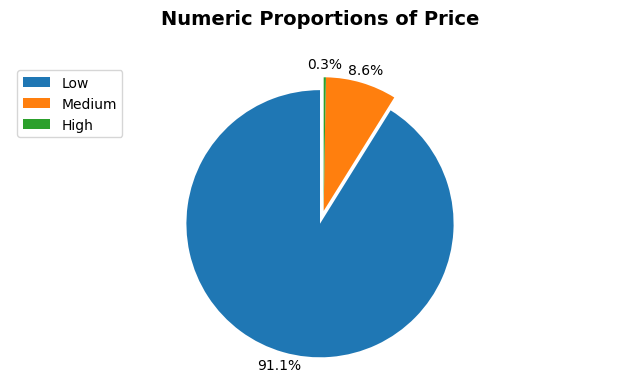

In [242]:
# Visualizing the numeric proportions of price with pie plot
explode_list = [0.1, 0, 0] 
df_price_binned.plot(kind='pie',
                            figsize = (8, 4),
                            autopct = '%1.1f%%', 
                            startangle = 90,    
                            shadow = False,       
                            labels = None,         
                            pctdistance = 1.1,    
                            explode = explode_list 
                            )
plt.title('Numeric Proportions of Price', y = 1.1, fontweight ='bold', fontsize = 14) 
plt.axis('equal') 
plt.legend(labels = df_price_binned.index, loc='upper left', fontsize = 10) 
plt.ylabel('')
plt.show()

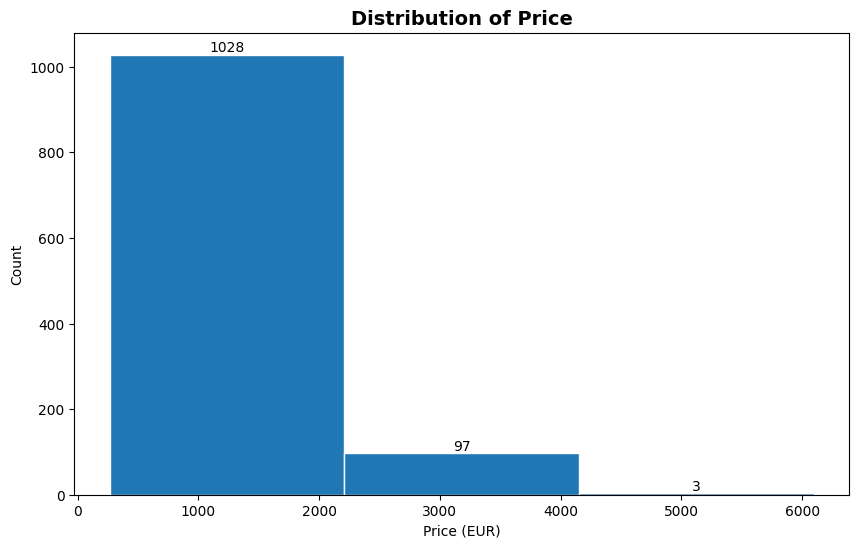

In [243]:
# Visualizing the distribution of price with histogram
plt.figure(figsize=(10, 6))
values, bins, bars = plt.hist(df['Price_EUR'], edgecolor='white', bins = 3)
plt.xlabel('Price (EUR)')
plt.ylabel('Count')
plt.title('Distribution of Price', fontweight ='bold', fontsize = 14)
plt.bar_label(bars, fontsize=10)
plt.show()

In [244]:
# Calculating the Pearson's second skewness coefficient (median skewness)
mean_price = df['Price_EUR'].mean()
median_price = df['Price_EUR'].median()
std = df['Price_EUR'].std()
price_skewness = (3 * (mean_price - median_price)) / std
print(f"The Pearson's second skewness score of laptop prices distribution is {price_skewness:.5f}.")

The Pearson's second skewness score of laptop prices distribution is 0.63880.


In [245]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 1127
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1128 non-null   object  
 1   Product           1128 non-null   object  
 2   Type_Name         1128 non-null   object  
 3   Inches            1128 non-null   float64 
 4   Operating_System  1128 non-null   object  
 5   CPU_Brand         1128 non-null   object  
 6   SSD               1128 non-null   int64   
 7   HDD               1128 non-null   int64   
 8   Flash_Storage     1128 non-null   int64   
 9   Hybrid            1128 non-null   int64   
 10  GPU_Brand         1128 non-null   object  
 11  Price_EUR         1128 non-null   float64 
 12  RAM_Integer       1128 non-null   int64   
 13  CPU_Rate_Integer  1128 non-null   float64 
 14  Touchscreen       1128 non-null   int64   
 15  IPS               1128 non-null   int64   
 16  Resolution_X      1128 non-nu

<br>
<h3>Conclusions After Data Wrangling:</h3>
The original dataset contained 1146 rows and 18 columns.<br>
The column with 1146 NULL values ('Unnamed: 16') was removed as well as 18 duplicate rows were found and removed resulting in a dataset with 1128 rows representing 1128 various laptop models and 17 columns giving information about different technical characteristics including pricing.<br>
The columns were renamed for clarity and consistency.<br>
The column 'RAM' was converted to integers replacing it with a new column 'RAM_Integer'. The column 'CPU_Rate' was converted to floats replacing it with a new column 'CPU_Rate_Integer'.<br>
Structured information (if laptop has touchscreen functionality, if screen is IPS, screen resolution X and Y) was extracted from the column 'Screen_Resolution' resulting in four new columns: 'Touchscreen', 'IPS', 'Resolution_X', 'Resolution_Y'. Then PPI was computed adding one more column - 'PPI'. The original column 'Screen_Resolution' was dropped.<br>
Four new columns were added after extracting structured information from the columns 'CPU_Model' (new columns: 'CPU_Generation' and 'CPU_Family') and 'GPU_Model' (new columns: 'GPU_Type' and 'GPU_Tier'). The columns 'CPU_Model' and 'GPU_Model' were dropped.<br>
Binning the data gave an insight on distribution of price based on 3 categories: "Low" (1028 or 91.1%), "Medium" (97 or 8.6%), and "High" (3 or 0.3%) resulting in an additional column to the dataset - "Price_EUR_Binned". The histogram shows that the distribution of laptop prices is right-skewed, and the Pierson's second skewness score (0.63880) indicates that the skewness is moderate.<br>
After data wrangling the dataset consists of 1128 rows representing 1128 various laptop models and 24 columns describing different technical characteristics including pricing.

In [246]:
# Saving the file locally
df.to_csv("laptop_prices_cleaned.csv")

<br>
<br>
<br>
<h1 align='center'>Exploratory Data Analysis (EDA)</h1>

In [247]:
# Listing the data types for each column
print(df.dtypes)

Company               object
Product               object
Type_Name             object
Inches               float64
Operating_System      object
CPU_Brand             object
SSD                    int64
HDD                    int64
Flash_Storage          int64
Hybrid                 int64
GPU_Brand             object
Price_EUR            float64
RAM_Integer            int64
CPU_Rate_Integer     float64
Touchscreen            int64
IPS                    int64
Resolution_X           int64
Resolution_Y           int64
PPI                  float64
CPU_Generation        object
CPU_Family            object
GPU_Type              object
GPU_Tier              object
Price_EUR_Binned    category
dtype: object


<h3>Numerical Variables</h3>

In [248]:
# Calculating the correlation between variables of type "int64" or "float64"
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr(method='spearman')

,Inches,SSD,HDD,Flash_Storage,Hybrid,Price_EUR,RAM_Integer,CPU_Rate_Integer,Touchscreen,IPS,Resolution_X,Resolution_Y,PPI
Inches,1.00,-0.26,0.48,-0.11,0.05,-0.15,0.10,0.24,-0.37,-0.11,-0.18,-0.18,-0.66
SSD,-0.26,1.00,-0.68,-0.11,-0.08,0.60,0.50,0.17,0.22,0.19,0.46,0.45,0.49
HDD,0.48,-0.68,1.00,-0.06,-0.08,-0.30,-0.17,0.04,-0.25,-0.14,-0.35,-0.35,-0.52
Flash_Storage,-0.11,-0.11,-0.06,1.00,-0.01,0.06,0.01,-0.06,-0.04,0.09,0.09,0.09,0.10
Hybrid,0.05,-0.08,-0.08,-0.01,1.00,-0.00,0.01,0.03,-0.04,-0.02,0.00,0.00,-0.03
Price_EUR,-0.15,0.60,-0.30,0.06,-0.00,1.00,0.71,0.39,0.23,0.25,0.57,0.57,0.48
RAM_Integer,0.10,0.50,-0.17,0.01,0.01,0.71,1.00,0.39,0.16,0.21,0.49,0.48,0.30
CPU_Rate_Integer,0.24,0.17,0.04,-0.06,0.03,0.39,0.39,1.00,-0.10,0.05,0.17,0.17,0.01
Touchscreen,-0.37,0.22,-0.25,-0.04,-0.04,0.23,0.16,-0.10,1.00,0.13,0.32,0.32,0.41
IPS,-0.11,0.19,-0.14,0.09,-0.02,0.25,0.21,0.05,0.13,1.00,0.29,0.29,0.27


In [249]:
df[['Price_EUR', 'RAM_Integer', 'SSD', 'HDD', 'PPI', 'Resolution_X', 'Resolution_Y', 'CPU_Rate_Integer']].corr(method='spearman')

,Price_EUR,RAM_Integer,SSD,HDD,PPI,Resolution_X,Resolution_Y,CPU_Rate_Integer
Price_EUR,1.00,0.71,0.60,-0.30,0.48,0.57,0.57,0.39
RAM_Integer,0.71,1.00,0.50,-0.17,0.30,0.49,0.48,0.39
SSD,0.60,0.50,1.00,-0.68,0.49,0.46,0.45,0.17
HDD,-0.30,-0.17,-0.68,1.00,-0.52,-0.35,-0.35,0.04
PPI,0.48,0.30,0.49,-0.52,1.00,0.81,0.81,0.01
Resolution_X,0.57,0.49,0.46,-0.35,0.81,1.00,1.00,0.17
Resolution_Y,0.57,0.48,0.45,-0.35,0.81,1.00,1.00,0.17
CPU_Rate_Integer,0.39,0.39,0.17,0.04,0.01,0.17,0.17,1.00


In [250]:
# Function for evaluating Spearman's correlation coefficient and p-value
def spearmans_coef_p_val (spearman_c, p_val):
    if (spearman_c <= 1) & (spearman_c >= 0.9):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a very high positive correlation between both variables.")
    elif (spearman_c >= -1) & (spearman_c <= -0.9):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a very high negative correlation between both variables.")
    elif (spearman_c < 0.9) & (spearman_c >= 0.7):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a high positive correlation between both variables.")
    elif (spearman_c > -0.9) & (spearman_c <= -0.7):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a high negative correlation between both variables.")
    elif (spearman_c < 0.7) & (spearman_c >= 0.5):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a moderate positive correlation between both variables.")
    elif (spearman_c > -0.7) & (spearman_c <= -0.5):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a moderate negative correlation between both variables.")
    elif (spearman_c < 0.5) & (spearman_c >= 0.3):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a low positive correlation between both variables.")
    elif (spearman_c > -0.5) & (spearman_c <= -0.3):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a low negative correlation between both variables.")
    elif (spearman_c < 0.3) & (spearman_c >= 0):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a negligible correlation between both variables.")
    elif (spearman_c > -0.3) & (spearman_c < 0):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a negligible correlation between both variables.")

    if p_val < 0.05:
        print("The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.")
    else:
        print("The p-value >= 0.05, so we fail to reject the null hypothesis. There is no statistically significant monotonic relationship between both variables.")

In [251]:
# RAM as a potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for RAM/Price
spearman_coef, p_value = stats.spearmanr(df['RAM_Integer'], df['Price_EUR'])
print("Spearman's correlation coefficient for RAM/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for RAM/Price:  0.7123369651451921 , P-value =  2.429284252334721e-175
Spearman's correlation coefficient is 0.7123369651451921 , so there is a high positive correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


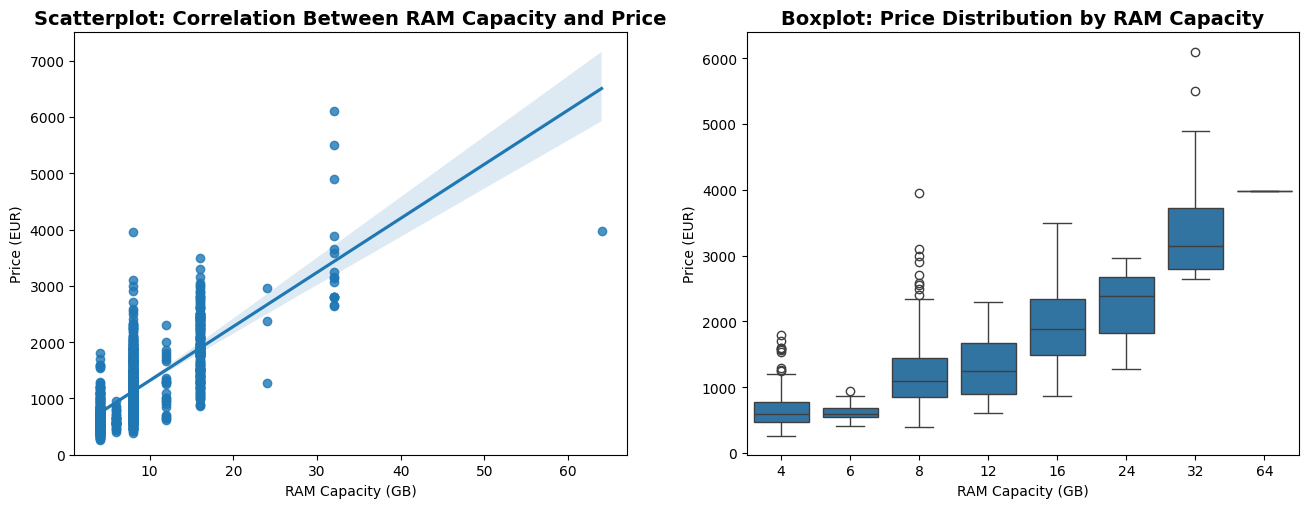

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Visualizing correlation between price and RAM capacity
sns.regplot(x='RAM_Integer', y='Price_EUR', data=df, ax=axes[0])
axes[0].set_ylim(0, None)  
axes[0].set_xlabel('RAM Capacity (GB)', fontsize = 10)
axes[0].set_ylabel('Price (EUR)', fontsize = 10)
axes[0].set_title('Scatterplot: Correlation Between RAM Capacity and Price', fontweight ='bold', fontsize = 14)

# Visualizing price distribution per RAM size
sns.boxplot(x='RAM_Integer', y='Price_EUR', data=df, ax=axes[1])
axes[1].set_xlabel('RAM Capacity (GB)', fontsize = 10)
axes[1].set_ylabel('Price (EUR)', fontsize = 10)
axes[1].set_title('Boxplot: Price Distribution by RAM Capacity', fontweight ='bold', fontsize = 14)

plt.tight_layout(pad=4.0)  
plt.show()

The scatterplot and the boxplot show that as the RAM capacity increases, the price increases as well: this indicates a positive direct correlation between these two variables. Spearman's correlation coefficient is aproximately 0.71 indicating high positive correlation between RAM capacity and laptop price.<br>
The boxplot shows that the median price increases with larger RAM capacity, and interquartile ranges also increase, indicating that devices with larger RAM have more diverse pricing. There are outliers in many RAM categories, but the trend remains consistent — higher RAM correlates with higher price.<br>
RAM capacity seems to be a good predictor of price, though not the only one.

In [253]:
# Resolution X as a potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for Resolution X/Price 
spearman_coef, p_value = stats.spearmanr(df['Resolution_X'], df['Price_EUR'])
print("Spearman's correlation coefficient for Resolution X/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for Resolution X/Price:  0.5701095681903892 , P-value =  3.223423483139564e-98
Spearman's correlation coefficient is 0.5701095681903892 , so there is a moderate positive correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


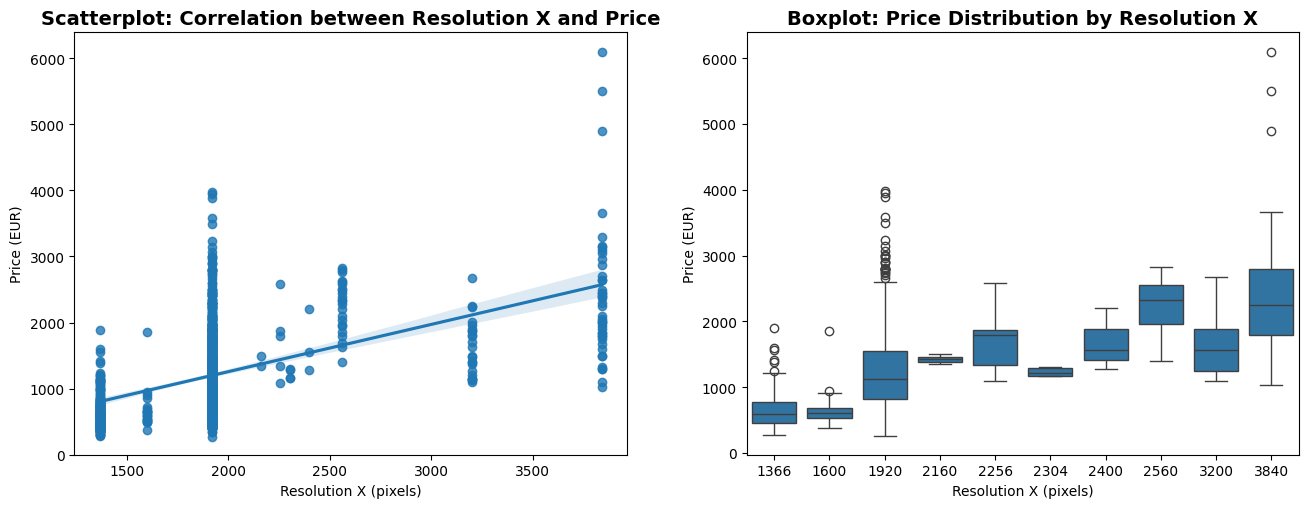

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Visualizing correlation between price and Resolution X
sns.regplot(x='Resolution_X', y='Price_EUR', data=df, ax=axes[0])
axes[0].set_ylim(0, None)  
axes[0].set_xlabel('Resolution X (pixels)', fontsize = 10)
axes[0].set_ylabel('Price (EUR)', fontsize = 10)
axes[0].set_title('Scatterplot: Correlation between Resolution X and Price', fontweight ='bold', fontsize = 14)

# Visualizing price distribution per Resolution X
sns.boxplot(x='Resolution_X', y='Price_EUR', data=df, ax=axes[1])
axes[1].set_xlabel('Resolution X (pixels)', fontsize = 10)
axes[1].set_ylabel('Price (EUR)', fontsize = 10)
axes[1].set_title('Boxplot: Price Distribution by Resolution X', fontweight ='bold', fontsize = 14)

plt.tight_layout(pad=4.0)  
plt.show()

There is a correlation between Resolution X and price — as Resolution X increases, the price tends to increase as well. Resolution X affects price, but not alone — many other specifications influence the price as well. Spearman's correlation coefficient is aproximately 0.57 indicating moderate positive correlation between Resolution X and laptop price.<br>
More outliers are present in categories of lower Resolution X meaning that some devices are very expensive regardless of Resolution X.<br>
Resolution X seems to be a useful predictor of price along with other variables that influence the price.

In [255]:
# Resolution Y as a potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for Resolution Y/Price 
spearman_coef, p_value = stats.spearmanr(df['Resolution_Y'], df['Price_EUR'])
print("Spearman's correlation coefficient for Resolution Y/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for Resolution Y/Price:  0.5664315959609416 , P-value =  1.0488098387140675e-96
Spearman's correlation coefficient is 0.5664315959609416 , so there is a moderate positive correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


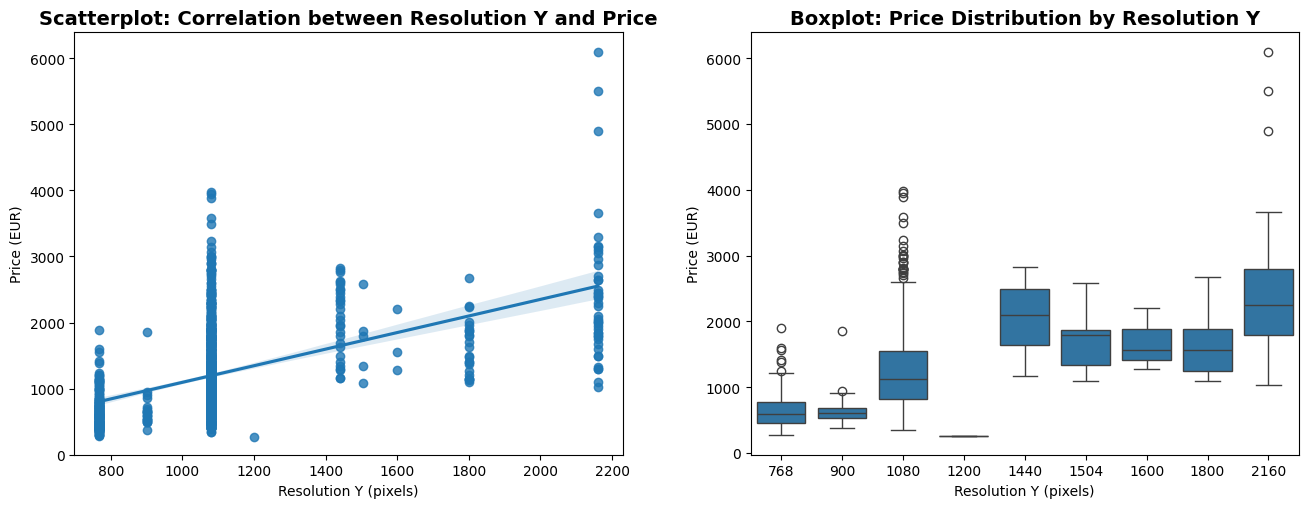

In [256]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Visualizing correlation between price and Resolution Y
sns.regplot(x='Resolution_Y', y='Price_EUR', data=df, ax=axes[0])
axes[0].set_ylim(0, None)  
axes[0].set_xlabel('Resolution Y (pixels)', fontsize = 10)
axes[0].set_ylabel('Price (EUR)', fontsize = 10)
axes[0].set_title('Scatterplot: Correlation between Resolution Y and Price', fontweight ='bold', fontsize = 14)

# Visualizing price distribution per Resolution Y
sns.boxplot(x='Resolution_Y', y='Price_EUR', data=df, ax=axes[1])
axes[1].set_xlabel('Resolution Y (pixels)', fontsize = 10)
axes[1].set_ylabel('Price (EUR)', fontsize = 10)
axes[1].set_title('Boxplot: Price Distribution by Resolution Y', fontweight ='bold', fontsize = 14)

plt.tight_layout(pad=4.0)  
plt.show()

There is a correlation between Resolution Y and price — as Resolution Y increases, the price tends to increase as well. Resolution Y affects price, but not alone — many other specifications influence the price as well. Spearman's correlation coefficient is aproximately 0.57 indicating moderate positive correlation between Resolution Y and laptop price.<br>
More outliers are present in categories of lower Resolution Y meaning that some devices are very expensive regardless of Resolution Y.<br>
Resolution Y seems to be a useful predictor of price along with other variables that influence the price.

In [257]:
# SSD as potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for SSD/Price 
spearman_coef, p_value = stats.spearmanr(df['SSD'], df['Price_EUR'])
print("Spearman's correlation coefficient for SSD/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for SSD/Price:  0.595467939505685 , P-value =  3.475496896911031e-109
Spearman's correlation coefficient is 0.595467939505685 , so there is a moderate positive correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


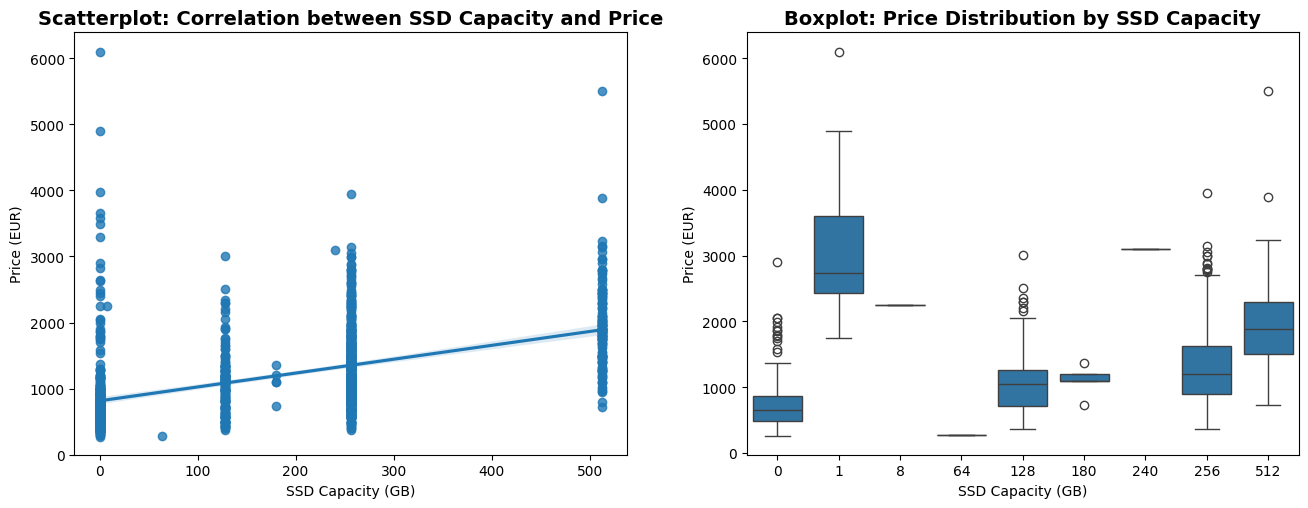

In [258]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Visualizing correlation between price and SSD capacity
sns.regplot(x='SSD', y='Price_EUR', data=df, ax=axes[0])
axes[0].set_ylim(0, None)  
axes[0].set_xlabel('SSD Capacity (GB)', fontsize = 10)
axes[0].set_ylabel('Price (EUR)', fontsize = 10)
axes[0].set_title('Scatterplot: Correlation between SSD Capacity and Price', fontweight ='bold', fontsize = 14)

# Visualizing price distribution per SSD capacity
sns.boxplot(x='SSD', y='Price_EUR', data=df, ax=axes[1])
axes[1].set_xlabel('SSD Capacity (GB)', fontsize = 10)
axes[1].set_ylabel('Price (EUR)', fontsize = 10)
axes[1].set_title('Boxplot: Price Distribution by SSD Capacity', fontweight ='bold', fontsize = 14)

plt.tight_layout(pad=4.0)  
plt.show()

There is a correlation between SSD capacity and price — as SSD capacity increases, the average price tends to increase as well. SSD capacity affects price, but not alone — many other specifications influence the price as well. Spearman's correlation coefficient is aproximately 0.59 indicating moderate positive correlation between SSD capacity and laptop price.<br>
The box plot shows that the price for smaller SSDs is more diverse, while larger SSDs tend to have higher median prices and wider interquartile ranges, meaning that devices with 256-512 GB SSDs tend to be more expensive in general. Outliers are present in almost all categories meaning that some devices are very expensive regardless of SSD capacity.<br>
SSD capacity seems to be a useful predictor of price along with other variables that influence the price.

In [259]:
# PPI as a potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for PPI/Price 
spearman_coef, p_value = stats.spearmanr(df['PPI'], df['Price_EUR'])
print("Spearman's correlation coefficient for PPI/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for PPI/Price:  0.4827898904238748 , P-value =  6.359258784426849e-67
Spearman's correlation coefficient is 0.4827898904238748 , so there is a low positive correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


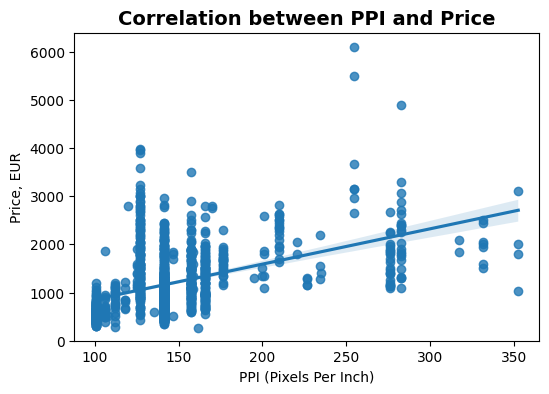

In [260]:
# Visualizing correlation between price and PPI
plt.figure(figsize=(6,4))
sns.regplot(x='PPI', y='Price_EUR', data=df)
plt.ylim(0,)
plt.xlabel('PPI (Pixels Per Inch)', fontsize = 10)
plt.ylabel('Price, EUR', fontsize = 10)
plt.title('Correlation between PPI and Price', fontweight ='bold', fontsize = 14)
plt.show()

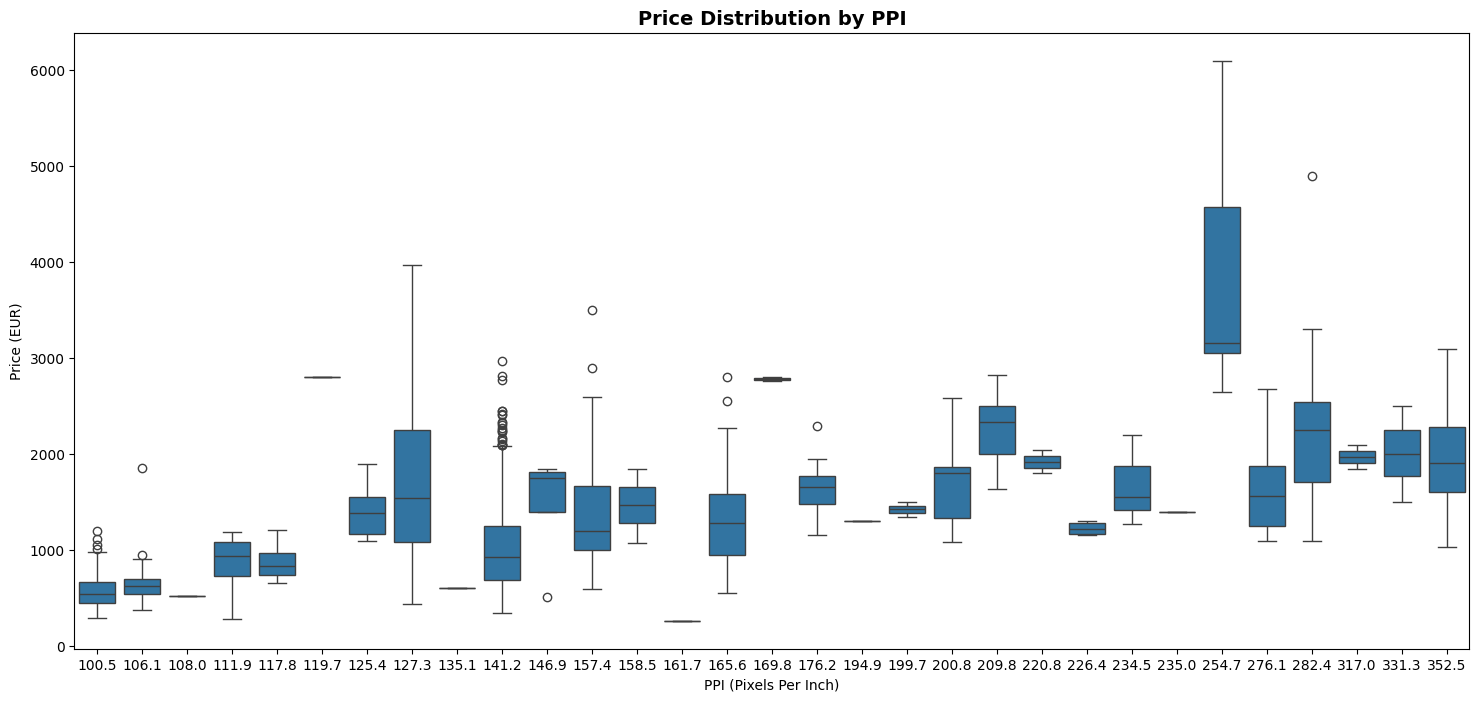

In [261]:
# Visualizing price distribution per PPI
plt.figure(figsize=(18,8))
sns.boxplot(x='PPI', y='Price_EUR', data=df)
plt.xlabel('PPI (Pixels Per Inch)', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Price Distribution by PPI', fontweight ='bold', fontsize = 14)
plt.show()

There is a correlation between PPI and price — as PPI increases, price tends to slightly increase as well, although not in a clearly monotonic way. PPI density influences price, but other specifications have a stronger impact. Spearman's correlation coefficient is aproximately 0.48 indicating moderate positive correlation between PPI and laptop price.<br>
Although a few categories have outliers and many categories overlap, the boxplot shows that the overall distribution of price between different PPI categories is diverse. As such, PPI could potentially be a predictor of price along with other variables that influence the price, but, since PPI was calculated from Resolution X and Resolution Y and these variables had higher Spearman's correlation coefficient than PPI, the PPI will be dropped as a predictor variable for the model. 

In [262]:
# Inches as potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for Inches/Price 
spearman_coef, p_value = stats.spearmanr(df['Inches'], df['Price_EUR'])
print("Spearman's correlation coefficient for Inches/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for Inches/Price:  -0.1512104821323388 , P-value =  3.3564741693802357e-07
Spearman's correlation coefficient is -0.1512104821323388 , so there is a negligible correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


In [263]:
# HDD as potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for HDD/Price 
spearman_coef, p_value = stats.spearmanr(df['HDD'], df['Price_EUR'])
print("Spearman's correlation coefficient for HDD/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for HDD/Price:  -0.3039271293532744 , P-value =  1.5553245302874633e-25
Spearman's correlation coefficient is -0.3039271293532744 , so there is a low negative correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


In [264]:
# Flash Storage as potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for Flash Storage/Price 
spearman_coef, p_value = stats.spearmanr(df['Flash_Storage'], df['Price_EUR'])
print("Spearman's correlation coefficient for Flash Storage/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for Flash Storage/Price:  0.058690993482379696 , P-value =  0.04875909516293297
Spearman's correlation coefficient is 0.058690993482379696 , so there is a negligible correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


In [265]:
# Hybrid as potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for Hybrid/Price 
spearman_coef, p_value = stats.spearmanr(df['Hybrid'], df['Price_EUR'])
print("Spearman's correlation coefficient for Hybrid/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for Hybrid/Price:  -0.002446965087726614 , P-value =  0.9345735009409578
Spearman's correlation coefficient is -0.002446965087726614 , so there is a negligible correlation between both variables.
The p-value >= 0.05, so we fail to reject the null hypothesis. There is no statistically significant monotonic relationship between both variables.


In [266]:
# CPU Rate as potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for CPU Rate/Price 
spearman_coef, p_value = stats.spearmanr(df['CPU_Rate_Integer'], df['Price_EUR'])
print("Spearman's correlation coefficient for CPU Rate/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for CPU Rate/Price:  0.3949096524307705 , P-value =  2.097716531705621e-43
Spearman's correlation coefficient is 0.3949096524307705 , so there is a low positive correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


In [267]:
# Touchscreen as potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for Touchscreen/Price 
spearman_coef, p_value = stats.spearmanr(df['Touchscreen'], df['Price_EUR'])
print("Spearman's correlation coefficient for Touchscreen/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for Touchscreen/Price:  0.2278054899436618 , P-value =  9.590165152339998e-15
Spearman's correlation coefficient is 0.2278054899436618 , so there is a negligible correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


In [268]:
# IPS as potential predictor variable of price
# Calculating Spearman's correlation coefficient and p-value for IPS/Price 
spearman_coef, p_value = stats.spearmanr(df['IPS'], df['Price_EUR'])
print("Spearman's correlation coefficient for IPS/Price: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for IPS/Price:  0.25420079355630426 , P-value =  4.288374313910069e-18
Spearman's correlation coefficient is 0.25420079355630426 , so there is a negligible correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


<h3>Categorical Variables</h3>

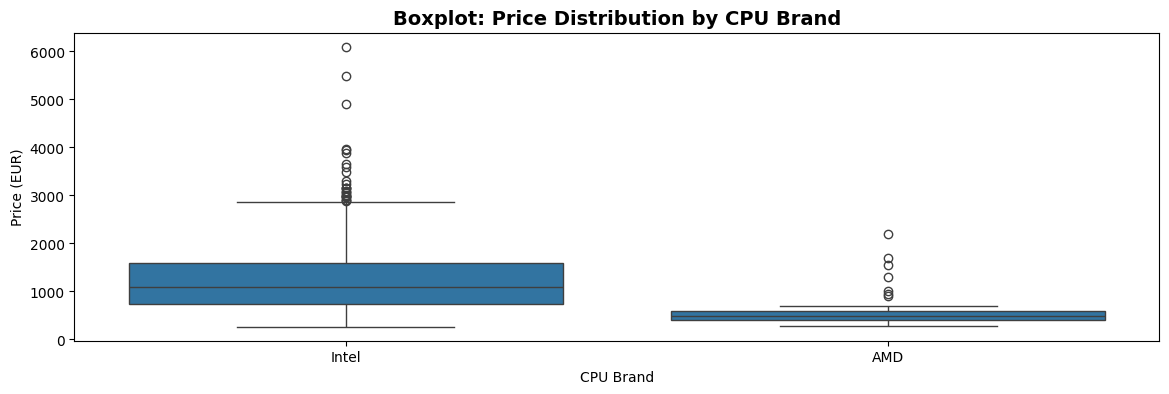

In [269]:
# Visualizing CPU_Brand as a potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='CPU_Brand', y='Price_EUR', data=df)
plt.xlabel('CPU Brand', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by CPU Brand', fontweight ='bold', fontsize = 14)
plt.show()

The distribution of price between these two CPU brand categories is distinct enough to take CPU brand as a potential good predictor of price.

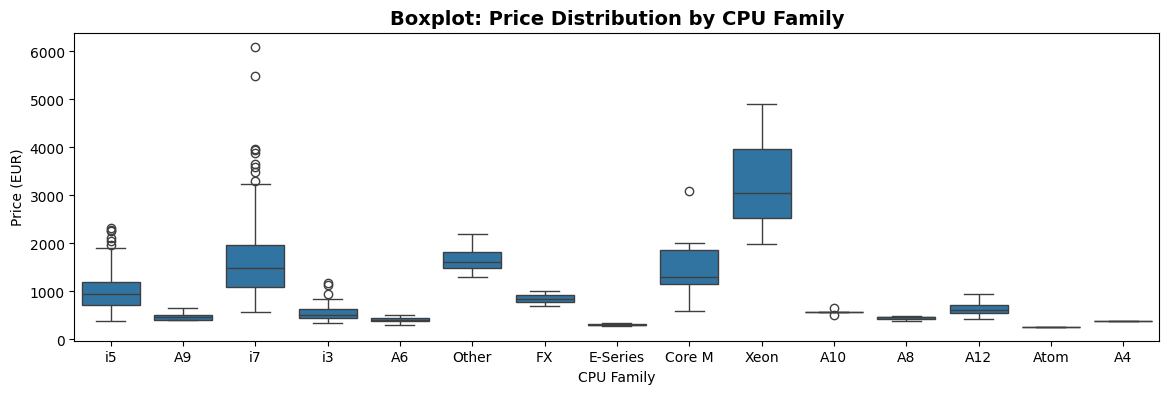

In [270]:
# Visualizing CPU Family as potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='CPU_Family', y='Price_EUR', data=df)
plt.xlabel('CPU Family', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by CPU Family', fontweight ='bold', fontsize = 14)
plt.show()

The distribution of price between CPU family categories is distinct enough to take CPU family as a potential good predictor of price.

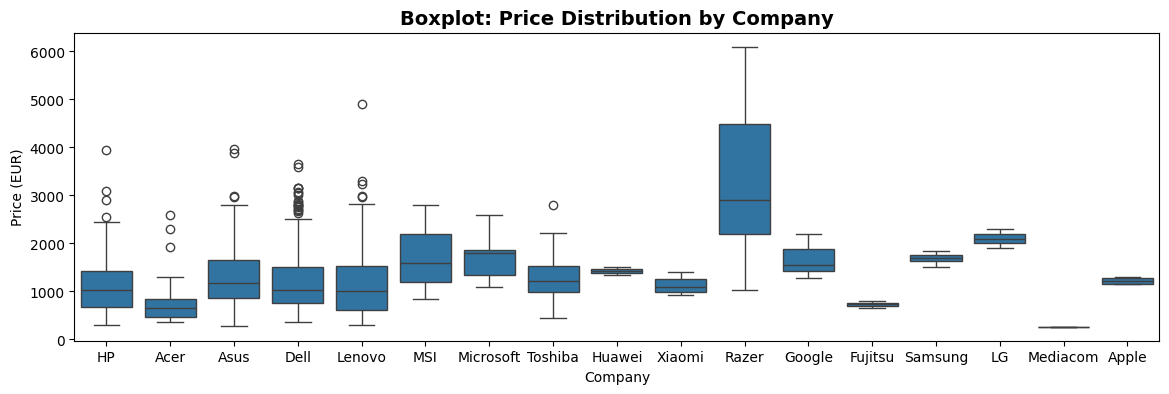

In [271]:
# Visualizing company as potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='Company', y='Price_EUR', data=df)
plt.xlabel('Company', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by Company', fontweight ='bold', fontsize = 14)
plt.show()

Although a few categories overlap, the boxplot shows that the overall distribution of price between different categories differs. As such, company could potentially be a predictor of price along with other variables that influence the price.

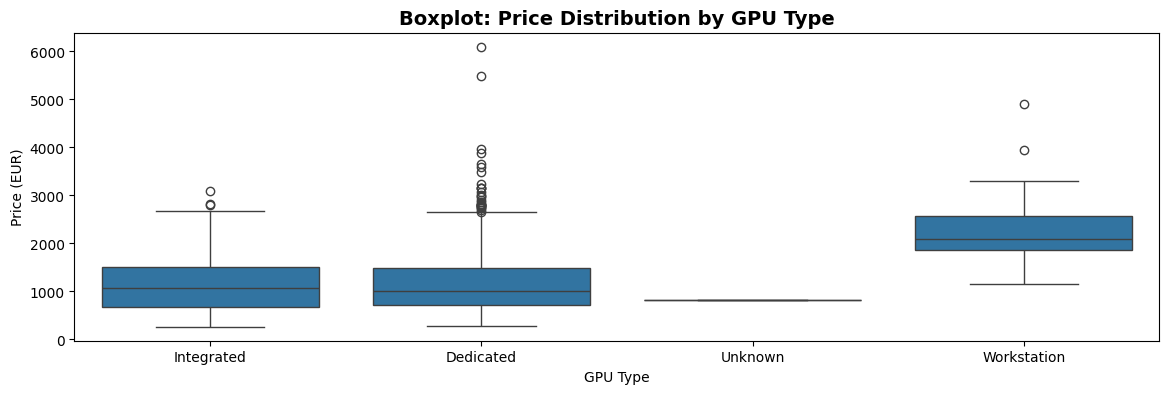

In [272]:
# Visualizing GPU Type as potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='GPU_Type', y='Price_EUR', data=df)
plt.xlabel('GPU Type', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by GPU Type', fontweight ='bold', fontsize = 14)
plt.show()

Although a few categories overlap, the boxplot shows that the overall distribution of price between the GPU type "Workstation" and other categories differs. As such, GPU type could potentially be a predictor of price along with other variables that influence the price.

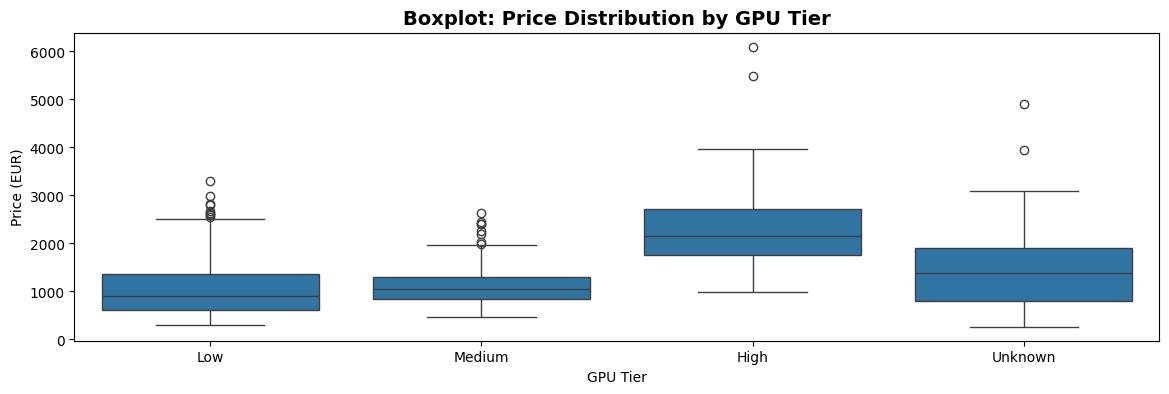

In [273]:
# Visualizing GPU Tier as potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='GPU_Tier', y='Price_EUR', data=df)
plt.xlabel('GPU Tier', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by GPU Tier', fontweight ='bold', fontsize = 14)
plt.show()

Although a few categories overlap, the boxplot shows that the overall distribution of price between high GPU tier and other categories differs. As such, GPU tier could potentially be a predictor of price along with other variables that influence the price.

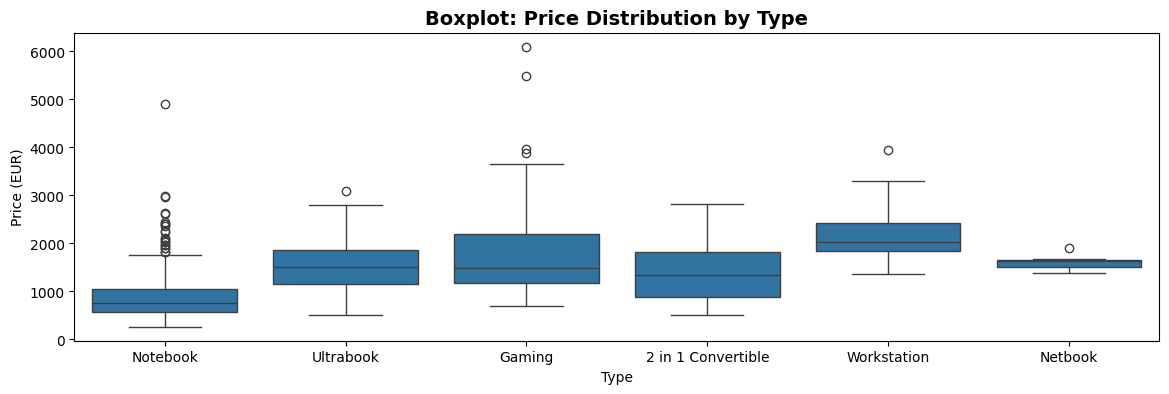

In [274]:
# Visualizing type as potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='Type_Name', y='Price_EUR', data=df)
plt.xlabel('Type', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by Type', fontweight ='bold', fontsize = 14)
plt.show()

The distribution of price between the different laptop type categories have a significant overlap, so laptop type would not be a good predictor of price.

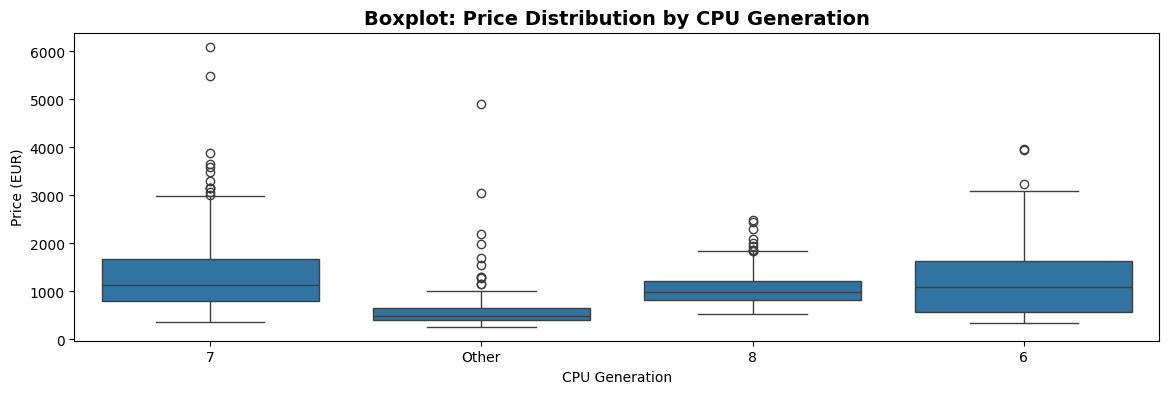

In [275]:
# Visualizing CPU Generation as potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='CPU_Generation', y='Price_EUR', data=df)
plt.xlabel('CPU Generation', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by CPU Generation', fontweight ='bold', fontsize = 14)
plt.show()

The distribution of price between the different CPU generation categories have a significant overlap, so CPU generation would not be a good predictor of price.

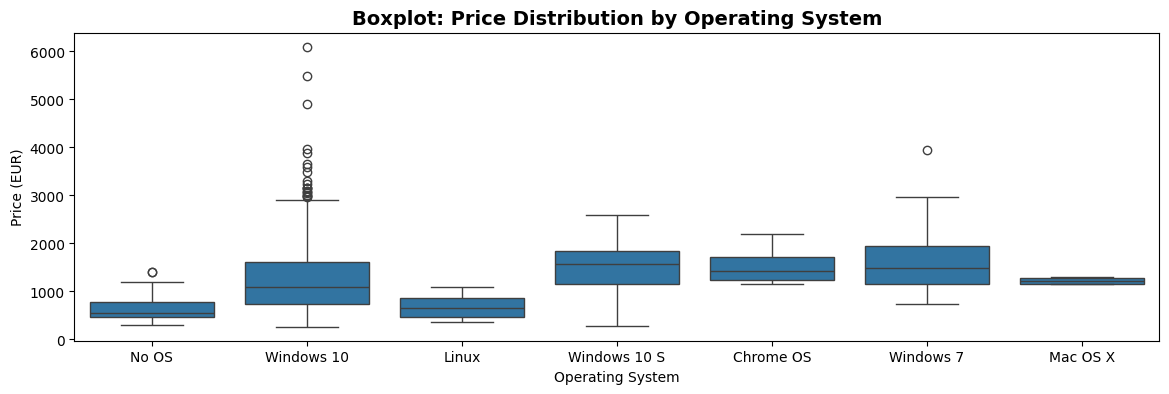

In [276]:
# Visualizing Operating_System as potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='Operating_System', y='Price_EUR', data=df)
plt.xlabel('Operating System', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by Operating System', fontweight ='bold', fontsize = 14)
plt.show()

The distribution of price between the different operating system categories have a significant overlap, so operating system would not be a good predictor of price.

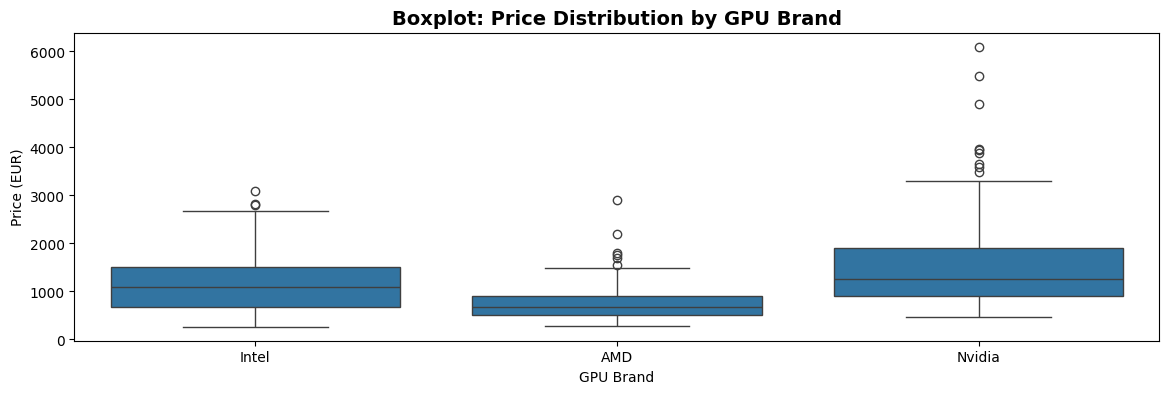

In [277]:
# Visualizing GPU Brand as potential predictor variable of price
plt.figure(figsize=(14,4))
sns.boxplot(x='GPU_Brand', y='Price_EUR', data=df)
plt.xlabel('GPU Brand', fontsize = 10)
plt.ylabel('Price (EUR)', fontsize = 10)
plt.title('Boxplot: Price Distribution by GPU Brand', fontweight ='bold', fontsize = 14)
plt.show()

The distribution of price between the different GPU brand categories have a significant overlap, so GPU brand would not be a good predictor of price.

<h3>Descriptive Statistical Analysis</h3>

In [278]:
# Computing basic statistics for all variables
df.describe(include = 'all')

,Company,Product,Type_Name,Inches,Operating_System,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid,...,Touchscreen,IPS,Resolution_X,Resolution_Y,PPI,CPU_Generation,CPU_Family,GPU_Type,GPU_Tier,Price_EUR_Binned
count,1128,1128,1128,"1,128.00",1128,1128,"1,128.00","1,128.00","1,128.00","1,128.00",...,"1,128.00","1,128.00","1,128.00","1,128.00","1,128.00",1128,1128,1128,1128,1128
unique,17,527,6,NaN,7,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,15,4,4,3
top,Dell,XPS 13,Notebook,NaN,Windows 10,Intel,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7,i7,Integrated,Low,Low
freq,280,30,614,NaN,964,1072,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,610,509,580,682,1028
mean,NaN,NaN,NaN,15.16,NaN,NaN,188.66,46.19,1.93,0.53,...,0.15,0.29,"1,937.00","1,092.22",148.43,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.32,NaN,NaN,159.23,143.97,26.48,15.15,...,0.36,0.45,489.81,278.50,42.85,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,11.30,NaN,NaN,0.00,0.00,0.00,0.00,...,0.00,0.00,"1,366.00",768.00,100.50,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.00,NaN,NaN,0.00,0.00,0.00,0.00,...,0.00,0.00,"1,920.00","1,080.00",127.30,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,15.60,NaN,NaN,256.00,0.00,0.00,0.00,...,0.00,0.00,"1,920.00","1,080.00",141.20,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,15.60,NaN,NaN,256.00,1.00,0.00,0.00,...,0.00,1.00,"1,920.00","1,080.00",157.40,NaN,NaN,NaN,NaN,NaN


In [279]:
# Value count in the column 'RAM_Integer'
ram_counts = df['RAM_Integer'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts = ram_counts.rename(columns={'RAM_Integer': 'RAM (GB)'})
ram_counts

,RAM (GB),count
0,8,594
1,4,262
2,16,193
3,6,34
4,12,25
5,32,16
6,24,3
7,64,1


In [280]:
# Value count in the column 'SSD'
ram_counts = df['SSD'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts = ram_counts.rename(columns={'SSD': 'SSD (GB)'})
ram_counts

,SSD (GB),count
0,256,490
1,0,328
2,128,157
3,512,129
4,1,16
5,180,5
6,64,1
7,240,1
8,8,1


In [281]:
# Value count in the column 'PPI'
ram_counts = df['PPI'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts

,PPI,count
0,141.20,416
1,100.50,154
2,127.30,129
3,157.40,124
4,165.60,105
5,276.10,24
6,176.20,24
7,282.40,23
8,111.90,22
9,106.10,21


In [282]:
# Value count in the column 'Resolution_X'
ram_counts = df['Resolution_X'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts

,Resolution_X,count
0,1920,809
1,1366,193
2,3840,43
3,3200,24
4,2560,23
5,1600,22
6,2256,5
7,2304,4
8,2400,3
9,2160,2


In [283]:
# Value count in the column 'Resolution_Y'
ram_counts = df['Resolution_Y'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts

,Resolution_Y,count
0,1080,808
1,768,193
2,2160,43
3,1440,29
4,1800,24
5,900,22
6,1504,5
7,1600,3
8,1200,1


In [284]:
# Value count in the column 'GPU_Type'
ram_counts = df['GPU_Type'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts

,GPU_Type,count
0,Integrated,580
1,Dedicated,512
2,Workstation,35
3,Unknown,1


In [285]:
# Value count in the column 'GPU_Tier'
ram_counts = df['GPU_Tier'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts

,GPU_Tier,count
0,Low,682
1,Medium,239
2,Unknown,104
3,High,103


In [286]:
# Value count in the column 'Company'
ram_counts = df['Company'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts

,Company,count
0,Dell,280
1,Lenovo,261
2,HP,248
3,Asus,122
4,Acer,77
5,MSI,54
6,Toshiba,47
7,Samsung,7
8,Razer,7
9,Microsoft,5


In [287]:
# Value count in the column 'CPU_Brand'
ram_counts = df['CPU_Brand'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts

,CPU_Brand,count
0,Intel,1072
1,AMD,56


CPU brand would not be a good predictor variable for the price because the dataset only have 56 laptops with "AMD" CPU, and 1072 - with "Intel" CPU, so this result is skewed. This imbalance will make the model treat CPU brand as statistically insignificant. Since CPU family already encodes most of the variation related to brand, the variable CPU brand will not be used as a predictor for price.

In [288]:
# Value count in the column 'CPU_Family'
ram_counts = df['CPU_Family'].value_counts().to_frame()
ram_counts.reset_index(inplace=True)
ram_counts

,CPU_Family,count
0,i7,509
1,i5,411
2,i3,134
3,A9,15
4,Core M,14
5,A6,11
6,A12,8
7,A10,6
8,E-Series,5
9,A8,4


In [289]:
# Grouping by CPU_Family and RAM_Integer and calculating the average price
df_grouped = df[['CPU_Family','RAM_Integer', 'Price_EUR']]
df_grouped_table = df_grouped.groupby(['CPU_Family','RAM_Integer'],as_index=False).mean()

# Creating pivot table for the grouped result
grouped_pivot = df_grouped_table.pivot(index='CPU_Family',columns='RAM_Integer')
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

Price_EUR                                                      \
RAM_Integer        4      6        8        12       16       24       32   
CPU_Family                                                                  
A10            575.00 572.98   579.00     0.00     0.00     0.00     0.00   
A12              0.00 558.52   572.33   924.00     0.00     0.00     0.00   
A4             379.00   0.00     0.00     0.00     0.00     0.00     0.00   
A6             387.60   0.00   482.45     0.00     0.00     0.00     0.00   
A8             438.00   0.00   459.00     0.00     0.00     0.00     0.00   
A9             442.00 564.50   520.90     0.00     0.00     0.00     0.00   
Atom           265.00   0.00     0.00     0.00     0.00     0.00     0.00   
Core M         603.00   0.00 1,517.83     0.00 1,965.00     0.00     0.00   
E-Series       310.60   0.00     0.00     0.00     0.00     0.00     0.00   
FX               0.00   0.00   699.00     0.00   999.00     0.00     0.00   
Other            0.00   0.00 1,497.00     0.00 1,874.00     0.00     0.00   
Xeon             0.00   0.00 1,993.00     0.00 3,055.00     0.00 4,899.00   
i3             537.12 510.33   579.37     0.00     0.00     0.00     0.00   
i5             820.26 637.10 1,087.95   944.18 1,592.22     0.00     0.00   
i7             774.93 795.71 1,343.39 1,356.50 1,921.34 2,206.33 3,456.30   

                      
RAM_Integer       64  
CPU_Family            
A10             0.00  
A12             0.00  
A4              0.00  
A6              0.00  
A8              0.00  
A9              0.00  
Atom            0.00  
Core M          0.00  
E-Series        0.00  
FX              0.00  
Other           0.00  
Xeon            0.00  
i3              0.00  
i5              0.00  
i7          3,975.00

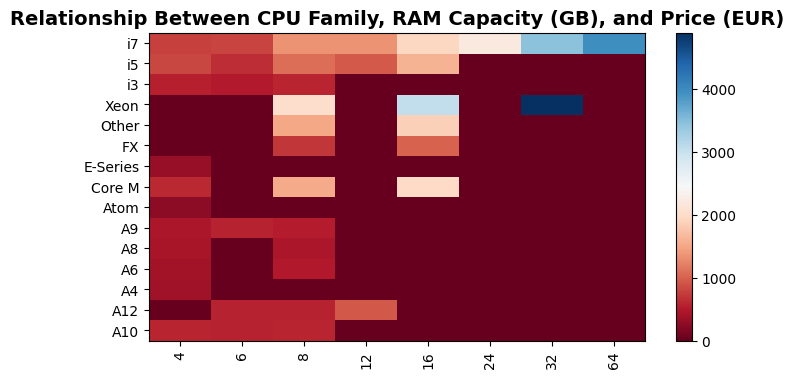

In [290]:
# Vizualizing the grouped by CPU Family and RAM results
fig, ax = plt.subplots(figsize =(8, 4))
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False, fontsize = 10)
ax.set_yticklabels(col_labels, minor=False, fontsize = 10)
plt.xticks(rotation=90)
ax.set_title('Relationship Between CPU Family, RAM Capacity (GB), and Price (EUR)', fontweight ='bold', fontsize = 14)
fig.colorbar(im)
plt.show()

The heatmap plots the price proportional to colour with respect to the variables CPU Family and RAM capacity on the vertical and horizontal axis, respectively. The visualization shows the price distribution in relationship to CPU Family and RAM capacity suggesting overall trend that as RAM capacity increases, the laptop prices tend to increase as well for all CPU family lines. 

<br>
<h3>Conclusions After Exploratory Data Analysis</h3>
<p>Based on the results of the exploratory data analysis, variables demonstrating the highest correlation with price were selected for further analysis:</p>
Numerical variables:
<ul>
    <li>RAM_Integer</li>
    <li>SSD</li>
    <li>Resolution_X</li>
    <li>Resolution_Y</li>
</ul>
Categorical variables:
<ul>
    <li>CPU_Family</li>
    <li>Company</li>
    <li>GPU_Type</li>
    <li>GPU_Tier</li>
</ul>
<p>From numerical variables only the variables that showed strong or moderate correlation (Spearman's correlation coefficient) with price were included for model development dropping features such as Inches, HDD, Flash_Storage, Hybrid, CPU_Rate_Integer, Touchscreen and IPS. PPI was excluded due to strong overlapping with Resolution_X and Resolution_Y.</p>
<p>After analyzing the categorical variables features such as Operating_System, Type_Name, CPU_Generation and GPU_Brand were excluded as predictor variables for model development based on weak patterns in boxplots or unbalanced distributions (e.g., CPU brand heavily dominated by "Intel").</p> 
<p>Feeding the model with variables that strongly affect the target variable will improve the model's prediction performance.</p>

<br>
<br>
<br>
<h1 align='center'>Model Building</h1>

<h3>Multiple Linear Regression</h3>

In [291]:
# Defining the target
y = df['Price_EUR'] 

# Defining the selected features
numerical_features = ['RAM_Integer', 'SSD', 'Resolution_X', 'Resolution_Y']
categorical_features = ['CPU_Family', 'Company', 'GPU_Type', 'GPU_Tier']

# Defining X
X = df[numerical_features + categorical_features]

In [292]:
# Preprocessor: scaling numerical features and one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_features),
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

In [293]:
# Building the pipeline for Multiple Linear Regression
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linreg_pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [294]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [295]:
# Fiting the model
linreg_pipeline.fit(X_train, y_train)

# Predicting
y_pred = linreg_pipeline.predict(X_test)
y_pred[0:5]

array([ 894.83770695,  510.72119872,  683.71887854, 1492.65507209,
       1281.21597699])

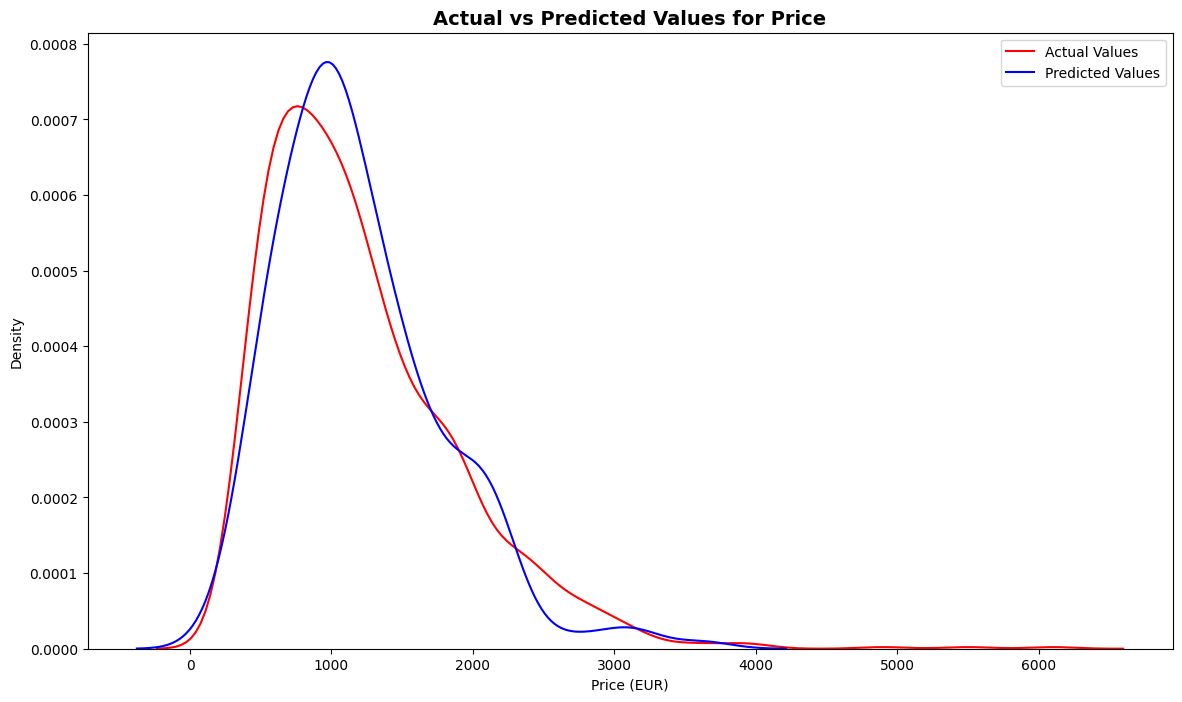

In [296]:
# Evaluating the model using distribution plot
plt.figure(figsize = (14, 8))
sns.kdeplot(y, color = 'r', label = 'Actual Value')
sns.kdeplot(y_pred, color = 'b', label = 'Predicted Values')
plt.legend(['Actual Values', 'Predicted Values'])
plt.title('Actual vs Predicted Values for Price', fontweight ='bold', fontsize = 14)
plt.xlabel('Price (EUR)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.show()

In [297]:
# Evaluating performance
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R² Score: 0.7695663725876921
MAE: 219.4448587664869
RMSE: 288.0966976339463


R² Score of approximately 0.770 indicates a strong correlation.<br>
Mean Absolute Error (MAE) indicates that, on average, the difference between the model's predictions and the actual values is about 219.445 EUR.<br>
Root Mean Squared Error (RMSE) suggests that the typical deviation of the predictions from the true values is about 288.097 EUR.<br>
The distribution plot shows that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, the performance could be improved.<br>

<br>
<br>
<br>
<h3>Polynomial Regression</h3>

In [298]:
# Preprocessor: scaling numerical features, creating new features by generating all polynomial combinations 
# up to degree 2 and one-hot encoding categorical features
poly_preprocessor = ColumnTransformer(
    transformers=[
        ('polynomial', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numerical_features),
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

In [299]:
# Building the pipeline for Polynomial Regression
poly_pipeline = Pipeline(steps=[
    ('preprocessor', poly_preprocessor),
    ('model', LinearRegression())
])

poly_pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('polynomial', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [300]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [301]:
# Fitting the model
poly_pipeline.fit(X_train, y_train)

# Predicting
y_pred_poly = poly_pipeline.predict(X_test)
y_pred_poly[0:5]

array([ 922.30958036,  507.28685712,  677.52332634, 1547.81749449,
       1277.44038761])

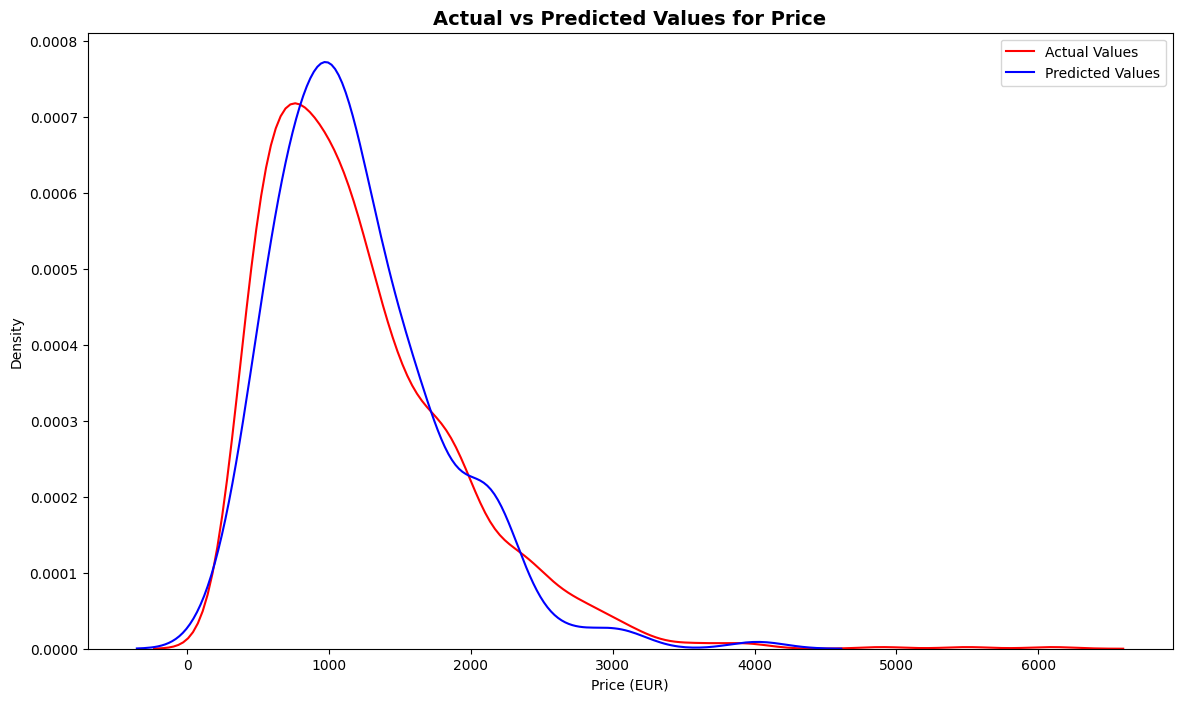

In [302]:
# Evaluating the model using distribution plot
plt.figure(figsize = (14, 8))
sns.kdeplot(y, color = 'r', label = 'Actual Values')
sns.kdeplot(y_pred_poly, color = 'b', label = 'Predicted Values')
plt.legend(['Actual Values', 'Predicted Values'])
plt.title('Actual vs Predicted Values for Price', fontweight = 'bold', fontsize = 14)
plt.xlabel('Price (EUR)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.show()

In [303]:
# Evaluating performance
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", root_mean_squared_error(y_test, y_pred_poly))

R² Score: 0.7714243790424138
MAE: 219.68076152568554
RMSE: 286.93287246783507


R² Score of approximately 0.771 indicates a strong correlation.<br>
Mean Absolute Error (MAE) indicates that, on average, the difference between the model's predictions and the actual values is about 219.681 EUR.<br>
Root Mean Squared Error (RMSE) suggests that the typical deviation of the predictions from the true values is about 286.933 EUR.<br>
The distribution plot shows that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, the performance could be improved.<br>

<br>
<h3>Conclusions After Model Building:</h3>
<p>Two baseline models were built:</p>
<ul>
    <li>Multiple Linear Regression to capture linear relationships;</li>
    <li>Polynomial Regression to allow nonlinear interactions between predictors.</li>
</ul>

<p>Multiple Linear Regression (MLR) vs. Polynomial Regression (PR):</p>
<ul>
    <li><b>R² Score</b>: The R² Score for the MLR is slightly smaller than for the PR (0.770 vs. 0.771). The results are very close - both explain approximately 77% of price variance.</li>
    <li><b>Mean Absolute Error (MAE)</b>: The MAE for the MLR is slightly smaller than the MAE for the PR (219.445 and 219.681). The results are practically identical — the average prediction error is approximately 220 EUR.</li>
    <li><b>Root Mean Squared Error (RMSE)</b>: The RMSE for the MLR is slightly bigger than the RMSE for the PR (288.097 and 286.933).</li>
</ul>

<p>Comparing these two models, the conclusion can be drawn that <b>the PR model performs slightly better</b> to predict the price from the dataset although the difference is negligible (Both models perform almost identically, and the small numerical differences are not statistically meaningful.). Polynomial regression offered only a marginal improvement, suggesting that the relationships between predictors and price are largely linear. The multiple linear model already captures the main linear relationships, and the polynomial features do not boost the model's predictive power significatly.</p>
<p>The result indicates that feature engineering and variable selection were done accurately including in model development only the most relevant predictor variables.</p>

<br>
<br>
<br>
<h1 align='center'>Model Evaluation and Refinement</h1>

<h3>Cross-Validation Scores</h3>

In [304]:
# Evaluating Multiple Linear Regression Model with a different metrics
cv_score = cross_val_score(linreg_pipeline, X, y, cv=5)
print("Individual cross-validation R² scores in folds:", cv_score)
print("Mean cross-validation R² score: {:.3f}".format(cv_score.mean()))
print("Standard deviation of cross-validation R² score: {:.3f}".format(cv_score.std()))

mse_score = cross_val_score(linreg_pipeline, X, y, cv=5, scoring = "neg_mean_squared_error")
rmse_score = np.sqrt(-mse_score)
print("Individual cross-validation RMSE scores in folds:", rmse_score)
print("Mean cross-validation RMSE score: {:.3f}".format(rmse_score.mean()))
print("Standard deviation of cross-validation RMSE score: {:.3f}".format(rmse_score.std()))

# Predicting the output
y_pred = cross_val_predict(linreg_pipeline, X, y, cv=5)
y_pred[0:5]

Individual cross-validation R² scores in folds: [0.66578208 0.79489172 0.82967024 0.65966127 0.65690319]
Mean cross-validation R² score: 0.721
Standard deviation of cross-validation R² score: 0.075
Individual cross-validation RMSE scores in folds: [373.06855141 275.62930827 293.52332447 404.14560553 394.60124029]
Mean cross-validation RMSE score: 348.194
Standard deviation of cross-validation RMSE score: 53.212


array([1300.98132366,   94.60108616, 1610.05813379, 1070.33931967,
        813.64655486])

* The mean cross-validation R² score of 0.721 indicates that the Multiple Linear Regression model is moderately to strongly effective at explaining the variance in the dependent variable: the model accounts for approximately 72.14% of the variability in the outcome based on the predictor variables.

* The standard deviation of 0.075 for cross-validation R² scores suggests that the model's performance is relatively stable and reliable across different subsets of the data.

* The mean cross-validation RMSE score of 348.194 suggests good, but not excellent performance: the average prediction error is about 348.2 EUR (about 6% of the total range of the target variable) indicating that the model captures the underlying patterns, but it could be improved.

* The standard deviation of cross-validation RMSE score of 53.212 EUR (or about 15% of the mean RMSE) suggests that the model's performance is relatively stable and quite consistent across the different subsets of data.

In [305]:
# Evaluating Polynomial Regression Model with a different metrics
cv_score_poly = cross_val_score(poly_pipeline, X, y, cv=5)
print("Individual cross-validation R² scores in folds:", cv_score_poly)
print("Mean cross-validation R² score: {:.3f}".format(cv_score_poly.mean()))
print("Standard deviation of cross-validation R² score: {:.3f}".format(cv_score_poly.std()))

mse_score_poly = cross_val_score(poly_pipeline, X, y, cv=5, scoring = "neg_mean_squared_error")
rmse_score_poly = np.sqrt(-mse_score_poly)
print("Individual cross-validation RMSE scores in folds:", rmse_score_poly)
print("Mean cross-validation RMSE score: {:.3f}".format(rmse_score_poly.mean()))
print("Standard deviation of cross-validation RMSE score: {:.3f}".format(rmse_score_poly.std()))

# Predicting the output
y_pred = cross_val_predict(poly_pipeline, X, y, cv=5)
y_pred[0:5]

Individual cross-validation R² scores in folds: [  0.69427046   0.80103987 -12.93493737   0.66503185   0.57228577]
Mean cross-validation R² score: -2.040
Standard deviation of cross-validation R² score: 5.448
Individual cross-validation RMSE scores in folds: [ 356.81448682  271.46686097 2654.91034449  400.94419545  440.58221385]
Mean cross-validation RMSE score: 824.944
Standard deviation of cross-validation RMSE score: 916.708


array([1297.4272197 ,  101.59122888, 1600.17922276, 1065.56205037,
        807.39673889])

* The mean cross-validation R² score of -2.040 suggests that the Polynomial Regression model is underperforming and is a very poor fit for the data.

* The standard deviation of 5.448 for cross-validation R² scores suggests that the model's performance is highly unstable and unreliable across different subsets of the data.

* The mean cross-validation RMSE score of 824.944 suggests poor performance: the average prediction error is about 824.944 EUR (about 14% of the total range of the target variable) indicating that the model does not capture the underlying patterns well.

* The standard deviation of cross-validation RMSE score of 916.708 EUR (or about 110% of the mean RMSE) indicates that the model's performance is unstable and depends heavily on the different subsets of data.

<h3>Regularization: Ridge Regression</h3>

The Multiple Linear Regression model is robust and generalizes well but the Polynomial Regression model without regularization was unstable in cross-validation, therefore Ridge Regression will be performed on the Polynomial Regression model to control overfitting.

In [306]:
# Building Ridge Regression model using built-in cross-validation to find the best regularization 
# parameter (alpha)
ridge_cv = RidgeCV(alphas = np.logspace(-2, 3, 10), cv = 5)

ridge_pipeline = Pipeline(steps = [
    ('preprocessor', poly_preprocessor),
    ('model', ridge_cv)
])

# Fitting the data
ridge_pipeline.fit(X_train, y_train)

print("Best alpha:", ridge_pipeline.named_steps['model'].alpha_)

# Predicting
y_ridge = ridge_pipeline.predict(X_test)
print(y_ridge[0:5])

Best alpha: 0.1291549665014884
[ 923.89807745  500.99949243  693.60679476 1409.90478754 1302.94223398]


In [307]:
# Evaluating Polynomial Regression Model with a different metrics
cv_score_ridge = cross_val_score(ridge_pipeline, X, y, cv=5)
print("Individual cross-validation R² scores in folds:", cv_score_ridge)
print("Mean cross-validation R² score: {:.3f}".format(cv_score_ridge.mean()))
print("Standard deviation of cross-validation R² score: {:.3f}".format(cv_score_ridge.std()))

mse_score_ridge = cross_val_score(ridge_pipeline, X, y, cv=5, scoring = "neg_mean_squared_error")
rmse_score_ridge = np.sqrt(-mse_score_ridge)
print("Individual cross-validation RMSE scores in folds:", rmse_score_ridge)
print("Mean cross-validation RMSE score: {:.3f}".format(rmse_score_ridge.mean()))
print("Standard deviation of cross-validation RMSE score: {:.3f}".format(rmse_score_ridge.std()))

# Predicting the output
y_pred_ridge = cross_val_predict(ridge_pipeline, X, y, cv=5)
y_pred_ridge[0:5]

Individual cross-validation R² scores in folds: [0.69963362 0.78856338 0.83629358 0.68492922 0.56270674]
Mean cross-validation R² score: 0.714
Standard deviation of cross-validation R² score: 0.094
Individual cross-validation RMSE scores in folds: [353.67099105 279.84908701 287.7598516  388.85369989 445.48850506]
Mean cross-validation RMSE score: 351.124
Standard deviation of cross-validation RMSE score: 62.337


array([1312.50821171,   84.79028794, 1600.20058752, 1113.44089038,
        774.67893885])

* The mean cross-validation R² score of 0.714 indicates that the Ridge Regression model is moderately to strongly effective at explaining the variance in the dependent variable: the model accounts for approximately 71.4% of the variability in the outcome based on the predictor variables.

* The standard deviation of 0.094 for cross-validation R² scores suggests that the model's performance is relatively stable and reliable across different subsets of the data.

* The mean cross-validation RMSE score of 351.124 suggests good, but not excellent performance: the average prediction error is about 351.124 EUR (about 6% of the total range of the target variable) indicating that the model captures the underlying patterns, but it could be improved.

* The standard deviation of cross-validation RMSE score of 62.337 EUR (or about 18% of the mean RMSE) suggests that the model's performance is relatively stable and quite consistent across the different subsets of data.

In [308]:
# Comparing the models
print("Model Comparison Summary (Cross-Validation)")
print("-----------------------------------------------------------------------------------")
print(f"{'Model':<30} {'Mean R²':<10} {'Std R²':<10} {'Mean RMSE':<15} {'Std RMSE':<10}")
print("-----------------------------------------------------------------------------------")
print(f"{'Multiple Linear Regression':<30} {0.721:<10.3f} {0.075:<10.3f} {348.194:<15.3f} {53.212:<10.3f}")
print(f"{'Polynomial Regression':<30} {-2.040:<10.3f} {5.448:<10.3f} {824.944:<15.3f} {916.708:<10.3f}")
print(f"{'Ridge Regression (CV)':<30} {0.714:<10.3f} {0.094:<10.3f} {351.124:<15.3f} {62.337:<10.3f}")
print("-----------------------------------------------------------------------------------")


Model Comparison Summary (Cross-Validation)
-----------------------------------------------------------------------------------
Model                          Mean R²    Std R²     Mean RMSE       Std RMSE  
-----------------------------------------------------------------------------------
Multiple Linear Regression     0.721      0.075      348.194         53.212    
Polynomial Regression          -2.040     5.448      824.944         916.708   
Ridge Regression (CV)          0.714      0.094      351.124         62.337    
-----------------------------------------------------------------------------------


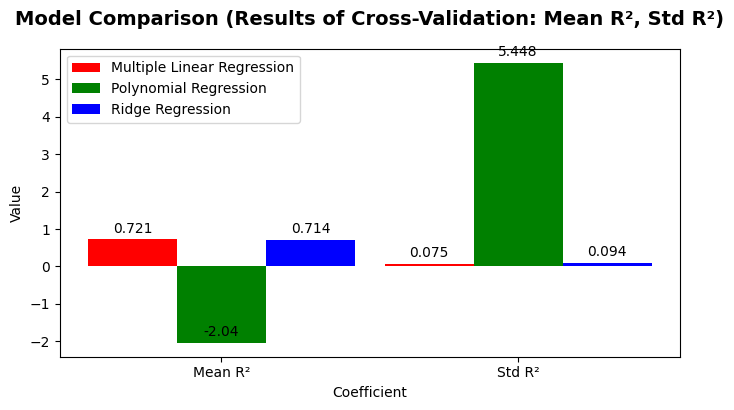

In [309]:
# Bar plot to compare results of cross-validation (Mean R², Std R²)
barWidth = 0.3
fig = plt.subplots(figsize = (8, 4)) 

MultipleLinearRegression = [0.721, 0.075] 
PolynomialRegression = [-2.040, 5.448] 
RidgeRegression = [0.714, 0.094] 

coef1 = np.arange(len(MultipleLinearRegression)) 
coef2 = [x + barWidth for x in coef1] 
coef3 = [x + barWidth for x in coef2] 

plt.bar(coef1, MultipleLinearRegression, color ='r', width = barWidth, label = 'Multiple Linear Regression') 
for i in range(len(MultipleLinearRegression)):
    plt.annotate(str(MultipleLinearRegression[i]), xy = (coef1[i], MultipleLinearRegression[i]), xytext = (0, 5),
                 textcoords = 'offset points', ha = 'center')
    
plt.bar(coef2, PolynomialRegression, color ='g', width = barWidth, label = 'Polynomial Regression') 
for i in range(len(PolynomialRegression)):
    plt.annotate(str(PolynomialRegression[i]), xy = (coef2[i], PolynomialRegression[i]), xytext = (0, 5),
                 textcoords = 'offset points', ha = 'center')

plt.bar(coef3, RidgeRegression, color ='b', width = barWidth, label = 'Ridge Regression') 
for i in range(len(RidgeRegression)):
    plt.annotate(str(RidgeRegression[i]), xy = (coef3[i], RidgeRegression[i]), xytext = (0, 5),
                 textcoords = 'offset points', ha = 'center')

plt.title('Model Comparison (Results of Cross-Validation: Mean R², Std R²)', y = 1.05, fontweight ='bold', fontsize = 14)
plt.xlabel('Coefficient', fontsize = 10) 
plt.ylabel('Value', fontsize = 10) 
plt.xticks([r + barWidth for r in range(len(MultipleLinearRegression))], 
        ['Mean R²', 'Std R²'])
plt.legend()
  
plt.show() 

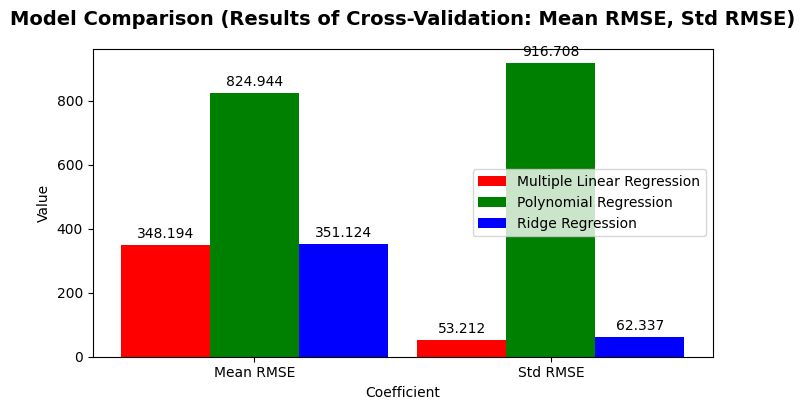

In [310]:
# Bar plot to compare results of Cross-Validation (Mean RMSE, Std RMSE)
barWidth = 0.3
fig = plt.subplots(figsize = (8, 4)) 

MultipleLinearRegression = [348.194, 53.212] 
PolynomialRegression = [824.944, 916.708] 
RidgeRegression = [351.124, 62.337] 

coef1 = np.arange(len(MultipleLinearRegression)) 
coef2 = [x + barWidth for x in coef1] 
coef3 = [x + barWidth for x in coef2] 

plt.bar(coef1, MultipleLinearRegression, color ='r', width = barWidth, label = 'Multiple Linear Regression') 
for i in range(len(MultipleLinearRegression)):
    plt.annotate(str(MultipleLinearRegression[i]), xy = (coef1[i], MultipleLinearRegression[i]), xytext = (0, 5),
                 textcoords = 'offset points', ha = 'center')
    
plt.bar(coef2, PolynomialRegression, color ='g', width = barWidth, label = 'Polynomial Regression') 
for i in range(len(PolynomialRegression)):
    plt.annotate(str(PolynomialRegression[i]), xy = (coef2[i], PolynomialRegression[i]), xytext = (0, 5),
                 textcoords = 'offset points', ha = 'center')

plt.bar(coef3, RidgeRegression, color ='b', width = barWidth, label = 'Ridge Regression') 
for i in range(len(RidgeRegression)):
    plt.annotate(str(RidgeRegression[i]), xy = (coef3[i], RidgeRegression[i]), xytext = (0, 5),
                 textcoords = 'offset points', ha = 'center')

plt.title('Model Comparison (Results of Cross-Validation: Mean RMSE, Std RMSE)', y = 1.05, fontweight ='bold', fontsize = 14)
plt.xlabel('Coefficient', fontsize = 10) 
plt.ylabel('Value', fontsize = 10) 
plt.xticks([r + barWidth for r in range(len(MultipleLinearRegression))], 
        ['Mean RMSE', 'Std RMSE'])
plt.legend()

plt.show() 

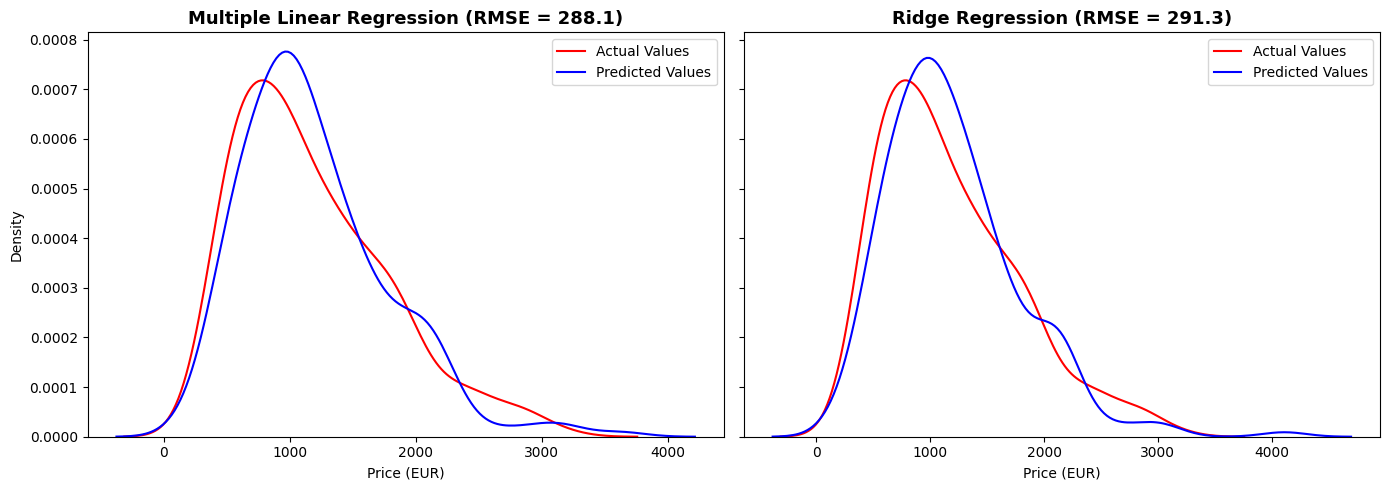

In [311]:
# Multiple Linear Regression and Ridge Regression model evaluation using distribution plots

# Fitting the models
linreg_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)

# Predicting
y_pred = linreg_pipeline.predict(X_test)
y_ridge = ridge_pipeline.predict(X_test)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize = (14, 5), sharey = True)

# Multiple Linear Regression
sns.kdeplot(y_test, color = 'r', label = 'Actual Values', ax = axes[0])
sns.kdeplot(y_pred, color = 'b', label = 'Predicted Values', ax = axes[0])
axes[0].set_title(f'Multiple Linear Regression (RMSE = {root_mean_squared_error(y_test, y_pred):.1f})', fontweight='bold', fontsize = 13)
axes[0].set_xlabel('Price (EUR)', fontsize = 10)
axes[0].set_ylabel('Density', fontsize = 10)
axes[0].legend()

# Ridge Regression
sns.kdeplot(y_test, color = 'r', label = 'Actual Values', ax = axes[1])
sns.kdeplot(y_ridge, color = 'b', label = 'Predicted Values', ax = axes[1])
axes[1].set_title(f'Ridge Regression (RMSE = {root_mean_squared_error(y_test, y_ridge):.1f})', fontweight = 'bold', fontsize = 13)
axes[1].set_xlabel('Price (EUR)', fontsize = 10)
axes[1].set_ylabel('')
axes[1].legend()

plt.tight_layout()
plt.show()

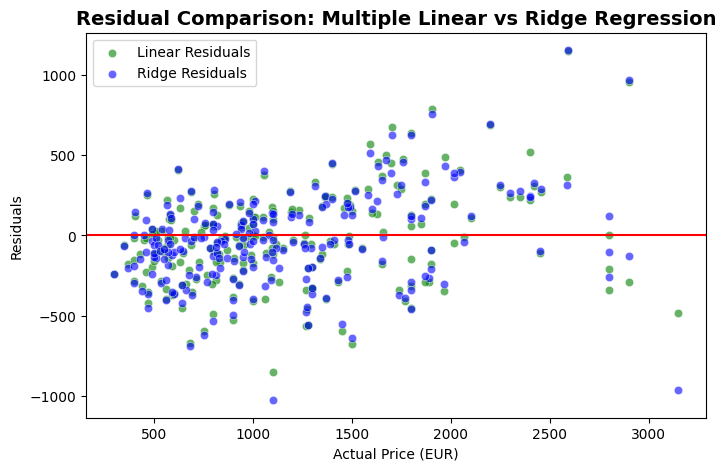

In [312]:
# Multiple Linear Regression and Ridge Regression model evaluation using residual plots
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test, y = (y_test - y_pred), color = 'green', alpha = 0.6, label = 'Linear Residuals')
sns.scatterplot(x = y_test, y = (y_test - y_ridge), color = 'blue', alpha = 0.6, label = 'Ridge Residuals')
plt.axhline(y = 0, color = 'red', linestyle = '-')
plt.xlabel('Actual Price (EUR)', fontsize = 10)
plt.ylabel('Residuals', fontsize = 10)
plt.title('Residual Comparison: Multiple Linear vs Ridge Regression', fontweight = 'bold', fontsize = 14)
plt.legend()
plt.show()

<br>
<h3>Conclusions After Model Evaluation And Refinement</h3>
Cross-validation confirmed that the Multiple Linear Regression model generalizes well, but the Polynomial Regression model encountered a problem of overfitting (indicated by high variance across different model folds).
<br>

To improve the Polynomial model, Ridge Regression was introduced. Using RidgeCV for automatic alpha selection and 5-fold cross-validation, the model's performance was improved significantly.
<br>

Comparing the two best performing models - Multiple Linear Regression model and Ridge Regression model - it is clear that the performance gap between them is minimal: <br>
Mean R²: Multiple Linear Regression: 0.721 / Ridge Regression (CV): 0.714;<br>
Std R²: Multiple Linear Regression: 0.721 / Ridge Regression (CV): 0.094;<br>
Mean RMSE: Multiple Linear Regression: 348.194 / Ridge Regression (CV): 351.124;<br>
Std RMSE: Multiple Linear Regression: 53.212 / Ridge Regression (CV): 62.337.<br>

Given that the price relationships in this dataset appear largely linear and that regularization did not yield a significant improvement, the Multiple Linear Regression model can be considered the optimal choice for predicting laptop prices for this dataset. MLR model balances strong predictive accuracy with interpretability and simplicity. 


<br>
<br>
<h3>Price Prediction for a New Laptop</h3>

In [313]:
# Listing the features used for price prediction
X_train.columns

Index(['RAM_Integer', 'SSD', 'Resolution_X', 'Resolution_Y', 'CPU_Family',
       'Company', 'GPU_Type', 'GPU_Tier'],
      dtype='object')

In [314]:
# Predicting price for a new laptop
new_laptop = pd.DataFrame([{
    'RAM_Integer': 16,
    'SSD': 512,
    'Resolution_X': 1920,
    'Resolution_Y': 1080,
    'CPU_Family': 'i7',
    'Company': 'Asus',
    'GPU_Type': 'Dedicated',
    'GPU_Tier': 'Medium'
}])

predicted_price1 = linreg_pipeline.predict(new_laptop)
print(f'Predicted price (EUR): {predicted_price1[0]:.2f}')

Predicted price (EUR): 1598.82


<br>
<br>
<br>

<a href="https://www.freepik.com/free-ai-image/technology-hologram-indoors_330180621.htm#fromView=search&page=3&position=24&uuid=06df929e-eb23-4774-b0f8-c4b10d3a5cdd&query=laptop+data">Image "Technology hologram indoors" by Freepik</a>